## Проектная работа по изучению автомобильно рынка США, и
## разработка модели предказания цены б/у автомобилей.

### План выполнения задания:
1) Подготовка данных
2) Разделение на выборки(валидационная и тренировочная)
3) Репроцессенг данных
4) Обучение моделей
5) Выбор наилучшей модели на валидатационной выборке
6) Проверка на тестовой выборке
7) Заключение, вывод, рекомендации.

## 1. Подготовка данных.

Импортируем все инсрументы необходимые для работы.

In [1163]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import requests

In [1164]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [1165]:
from bs4 import BeautifulSoup

In [1166]:
sample_submission = pd.read_csv(r"C:\Users\Admin\dev1\second-project\sample_submission.csv")

In [1167]:
sample_submission

,vin,sellingprice
0,1g6dp567450124779,13592.209588
1,1gtw7fca7e1902207,13592.209588
2,jn8az1mw6dw303497,13592.209588
3,2g1wf5e34d1160703,13592.209588
4,1n6aa0ec3dn301209,13592.209588
...,...,...
110053,1j4aa2d17bl584330,13592.209588
110054,jthbf1d23e5007526,13592.209588
110055,1n4ba41e54c831950,13592.209588
110056,jn1az4eh3dm382431,13592.209588


In [1168]:
test = pd.read_csv(r"C:\Users\Admin\dev1\second-project\test.csv")
test

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,2011,Jeep,Wrangler,Sport,SUV,automatic,1j4aa2d17bl584330,ca,3.8,66085.0,orange,black,dtg operations inc,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
110054,2014,Lexus,IS 250,Base,sedan,automatic,jthbf1d23e5007526,fl,4.8,17588.0,gray,black,lexus financial services,Mon Jun 15 2015 11:00:00 GMT-0700 (PDT)
110055,2004,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,Thu Feb 05 2015 01:35:00 GMT-0800 (PST)
110056,2013,Nissan,370Z,Base,coupe,manual,jn1az4eh3dm382431,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)


In [1169]:
train = pd.read_csv(r"C:\Users\Admin\dev1\second-project\train.csv")
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST)
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST)


Посмотрим общую информацию о таблицах.

In [1170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [1171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


let is look at the gaps.

In [1172]:
train.isna().sum()

year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

In [1173]:
test.isna().sum()

year                0
make             2061
model            2079
trim             2114
body             2594
transmission    13011
vin                 0
state               0
condition        2379
odometer           19
color             158
interior          158
seller              0
saledate            0
dtype: int64

In [1174]:
t = test.isna().sum()
tr = train.isna().sum()

Проверим соотношение пропусков в тестовой и пренровочной выборках,
чтобы избежать искажение результатов.

In [1175]:
t/tr

body            0.249591
color           0.269625
condition       0.252951
interior        0.269625
make            0.256248
model           0.255940
odometer        0.275362
saledate             NaN
seller               NaN
sellingprice         NaN
state                NaN
transmission    0.252832
trim            0.253568
vin                  NaN
year                 NaN
dtype: float64

In [1176]:
len(test)/len(train)

0.24999772849108207

Есть небольшое но допустимое различие между данными по столбцам цвет автомобиля и 
пробег, отношение пропусков в остальных столбцах соответствует оношению колличества
строк таблиц. 

Проверим есть ли явные дубликаты.

In [1177]:
train.duplicated().sum()

0

Посмотрим на гистограмы с колличественными значенияли.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'sellingprice'}>]], dtype=object)

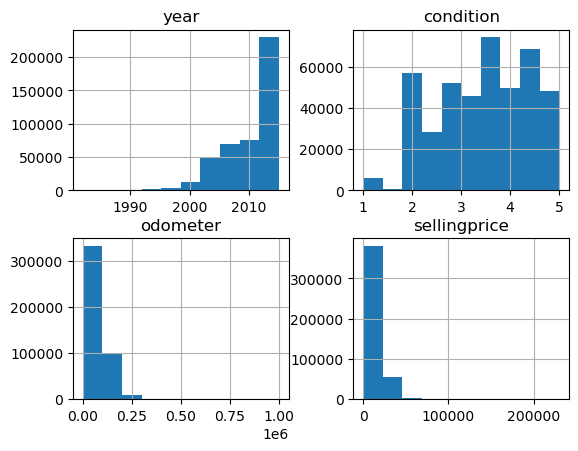

In [1178]:
train.hist()

Проверим Столбец цена.

In [1179]:
train['sellingprice'].min()


1

<Axes: >

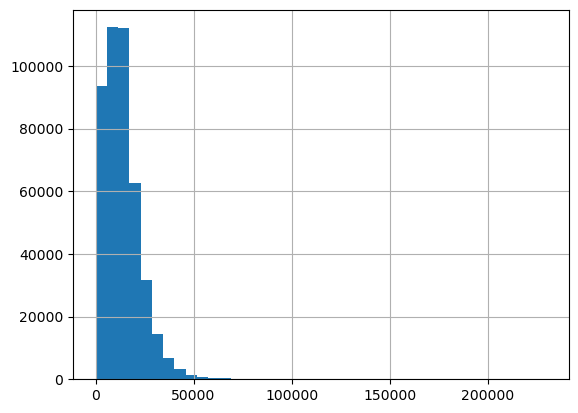

In [1180]:
train['sellingprice'].hist(bins=40)

In [1181]:
train[train['sellingprice']<10]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
137962,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.1,1.0,black,black,peoples credit company inc,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
418021,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.0,NaN,white,gray,laa leasing,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)


In [1182]:
train[train['sellingprice']<100]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
137962,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.1,1.0,black,black,peoples credit company inc,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
418021,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.0,NaN,white,gray,laa leasing,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)


In [1183]:
train[train['sellingprice']<300].count()

year            609
make            552
model           552
trim            551
body            539
transmission    532
vin             609
state           609
condition       573
odometer        606
color           608
interior        608
seller          609
sellingprice    609
saledate        609
dtype: int64

In [1184]:
#train[train['sellingprice']<100
train['sellingprice'].max()

230000

In [1185]:
train[train['sellingprice']>200000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
392004,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


In [1186]:
train.loc[train['sellingprice']==230000, 'sellingprice'] = \
(int(train[(train['model']=='Escape')&(train['year']==2014)]['sellingprice'].mean()))

Цена двух  автомобилей неибычно низкая(1 доллар), цена обдего автомобиля необычно высокая
заменим их цены на среднее по маркам и годам.

In [1187]:
train[train['sellingprice']==1]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
137962,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.1,1.0,black,black,peoples credit company inc,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
418021,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.0,NaN,white,gray,laa leasing,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)


Посмотрим на срезы данных с марка Mercedes-Benz год 2003 и Ford 2002-го года.

In [1188]:
train[(train['make'] =='Mercedes-Benz')&(train['year']==2003)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
2084,2003,Mercedes-Benz,M-Class,ML320,SUV,automatic,4jgab54ex3a376250,ga,2.9,149515.0,black,beige,milledgeville hyundai llc,3600,Tue May 26 2015 02:30:00 GMT-0700 (PDT)
3018,2003,Mercedes-Benz,E-Class,E320,Sedan,automatic,wdbuf65j83a194424,fl,2.2,226423.0,black,gray,santander consumer,2800,Tue Dec 23 2014 12:10:00 GMT-0800 (PST)
3393,2003,Mercedes-Benz,CLK-Class,CLK320,Coupe,automatic,wdbtj65j23f041356,ca,2.3,149985.0,silver,gray,san luis bay motors inc,3000,Thu Feb 19 2015 05:00:00 GMT-0800 (PST)
5548,2003,Mercedes-Benz,CLK-Class,CLK320,Convertible,automatic,wdblk65g13t140110,ca,1.9,157320.0,silver,gray,titlemax/san bernardino ca1,2100,Thu Feb 12 2015 04:00:00 GMT-0800 (PST)
5716,2003,Mercedes-Benz,M-Class,ML350,SUV,automatic,4jgab57e83a410682,ca,2.7,149650.0,gold,tan,lobel financial corp,2700,Wed Feb 11 2015 04:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436592,2003,Mercedes-Benz,SL-Class,SL500,Convertible,automatic,wdbsk75f43f032863,tx,4.5,83166.0,silver,—,wichita falls ford lin inc,14100,Wed Mar 04 2015 02:00:00 GMT-0800 (PST)
437081,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j03a107838,fl,3.9,90755.0,silver,gray,mercedes-benz of palm beach,8400,Thu Feb 05 2015 02:00:00 GMT-0800 (PST)
437779,2003,Mercedes-Benz,E-Class,E320,Sedan,automatic,wdbuf65j63a364330,va,2.9,87822.0,blue,beige,shirlie slack mitsubishi,7100,Thu Jan 22 2015 01:35:00 GMT-0800 (PST)
438797,2003,Mercedes-Benz,SL-Class,SL500,Convertible,automatic,wdbsk75f93f031336,fl,2.3,66511.0,white,black,coggin acura,14500,Tue May 26 2015 11:05:00 GMT-0700 (PDT)


In [1189]:
train.loc[(train['make']=='Ford')&(train['year']==2002)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
688,2002,Ford,Explorer,XLS,SUV,automatic,1fmzu62e62uc89805,fl,4.2,138782.0,gray,gray,coggin deland hyundai,2700,Tue Jan 06 2015 18:00:00 GMT-0800 (PST)
883,2002,Ford,Focus,SE,Sedan,automatic,1fafp34p82w339318,nc,1.9,200157.0,gold,beige,crossroads chrysler jeep dodge,700,Mon Feb 02 2015 00:31:00 GMT-0800 (PST)
1009,2002,Ford,Mustang,Base,Coupe,automatic,1fafp40432f123099,nc,2.7,157976.0,white,—,crossroads ford of wake forest inc,1600,Mon Jan 19 2015 01:00:00 GMT-0800 (PST)
1316,2002,Ford,Explorer,XLT,SUV,automatic,1fmdu73e82zc17750,ca,NaN,154653.0,black,—,j s auto brokers,2100,Wed Dec 17 2014 11:30:00 GMT-0800 (PST)
1433,2002,Ford,Escort,ZX2,Coupe,automatic,3fafp11392r182259,wi,2.6,93026.0,gray,gray,marine credit union,1000,Wed Mar 04 2015 02:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436736,2002,Ford,Explorer,Eddie Bauer,SUV,automatic,1fmdu74w12uc30506,oh,1.0,200555.0,black,tan,select remarketing group llc/loan max title,700,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
437757,2002,Ford,Mustang,Base,coupe,NaN,1fafp40472f242550,fl,2.6,136825.0,white,gray,mercedes-benz of ft pierce,2600,Thu May 28 2015 09:20:00 GMT-0700 (PDT)
438869,2002,Ford,Escape,XLT Premium,SUV,automatic,1fmcu03112kd99185,ne,2.6,105093.0,silver,gray,mercedes benz of omaha,3500,Wed Dec 31 2014 11:00:00 GMT-0800 (PST)
438917,2002,Ford,Expedition,Eddie Bauer,SUV,automatic,1fmru17w92la07392,tx,2.2,190415.0,black,brown,dt inventory,800,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)


In [1190]:
train.loc[(train['sellingprice']==1)&(train['make']=='Ford'), 'sellingprice'] = \
(int(train[(train['make'] =='Ford')&(train['year']==2002)]['sellingprice'].mean()))
train.loc[(train['sellingprice']==1)&(train['make']=='Mercedes-Benz'), 'sellingprice'] = \
(int(train[(train['make'] =='Mercedes-Benz')&(train['year']==2003)]['sellingprice'].mean()))

<Axes: >

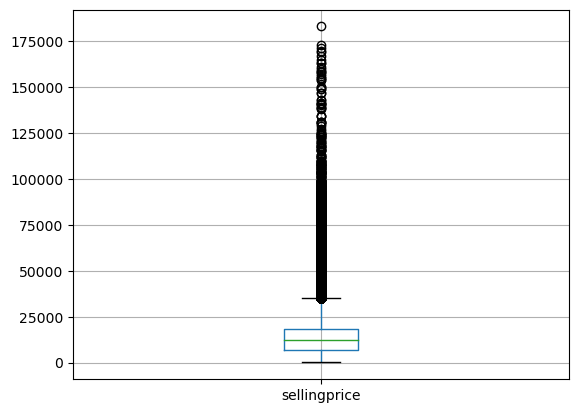

In [1191]:
train.boxplot(column = 'sellingprice')

In [1192]:
train['sellingprice'].describe()

count    440236.000000
mean      13591.748660
std        9746.005451
min         100.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      183000.000000
Name: sellingprice, dtype: float64

Изучим категорию срез данных с маленьким пробегом, небольшим возрастом автомобиля,
и с хорошим состоянием, но с маленькой ценой т.к. искуственное занижение цены 
автомобиля исказит данные для обучения. Для упрощения вычислений придется изучить
вышеперечисленные столбецы.

In [1193]:
train['saledate'].dtypes

dtype('O')

In [1194]:
for i in train['saledate'].unique():
    print(i)

Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
Thu May 21 2015 02:00:00 GMT-0700 (PDT)
Mon Jan 12 2015 09:30:00 GMT-0800 (PST)
Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
Thu Jan 22 2015 01:00:00 GMT-0800 (PST)
Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
Thu Jan 29 2015 03:30:00 GMT-0800 (PST)
Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
Tue Jan 06 2015 03:00:00 GMT-0800 (PST)
Wed Feb 25 2015 02:20:00 GMT-0800 (PST)
Wed Jan 28 2015 04:30:00 GMT-0800 (PST)
Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
Thu Feb 19 2015 04:00:00 GMT-0800 (PST)
Wed May 27 2015 03:30:00 GMT-0700 (PDT)
Wed Jan 21 2015 04:05:00 GMT-0800 (PST)
Wed Jan 14 2015 05:30:00 GMT-0800 (PST)
Tue Jan 27 2015 01:30:00 GMT-0800 (PST)
Tue Dec 23 2014 10:10:00 GMT-0800 (PST)
Wed Jan 14 2015 01:00:00 GMT-0800 (PST)


Напишем функцию для добавления в таблицу столбца с месяцем продажи т.к. 
месяц года  точно влияет на рыночную активность. 

In [1195]:
def month(row):
    try:
        if 'Dec' in row['saledate']:
            return 'Dec'
        elif  'Jan' in row['saledate']:
            return 'Jan'
        elif 'Feb'in row['saledate']:
            return 'Feb'
        elif 'Mar' in row['saledate']:
            return 'Mar'
        elif  'Apr' in row['saledate']:
            return 'Apr'
        elif 'May'in row['saledate']:
            return 'May'
        elif 'Jun' in row['saledate']:
            return 'Jun'
        elif 'Jul' in row['saledate']:
            return 'Jul' 
        elif  'Aug' in row['saledate']:
            return 'Aug'
        elif 'Sep' in row['saledate']:
            return 'Sep'
        elif 'Oct' in row['saledate']:
            return 'Oct'
        elif  'Nov' in row['saledate']:
            return 'Nov'
        else:
            return 0
    except:
        pass

In [1196]:
train['month'] = train.apply(month, axis =1)

In [1197]:
train['month'].unique()

array(['Jun', 'Feb', 'May', 'Jan', 'Dec', 'Mar', 'Apr', 'Jul'],
      dtype=object)

In [1198]:
train['month'].isna().sum()

0

Видно из исследования, что в таблице данные только за декабрь, январь, февраль,
март, апрель, май, июнь, июль. Зима, весна и лето(не полностью). 

Напишем функцию для слобца с годом продажи.

In [1199]:
def sale_year(row):
    r = row['saledate']
    r= r[11:15]
    return r

In [1200]:
train['sele_year'] = train.apply(sale_year, axis=1)

In [1201]:
train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015


Изучим столбецы State(состояние автомобиля), и столбец condition(сотояние автомобиля на момкнт аукциона).

In [1202]:
train['state'].unique()

array(['md', 'mo', 'nj', 'tx', 'mi', 'nc', 'fl', 'oh', 'ca', 'az', 'ga',
       'tn', 'in', 'pa', 'va', 'wi', 'co', 'ny', 'il', 'nv', 'mn', 'wa',
       'sc', 'la', 'ne', 'ok', 'or', 'on', 'ma', 'ab', 'pr', 'hi', 'ut',
       'qc', 'ms', 'nm', 'ns', 'al'], dtype=object)

Стобец state - обозначение в аукционном листе, каждое обозначение характеризует какое
либо повреждение.

In [1203]:
train['condition'].unique()

array([4.2, 3.5, 2.2, 2.8, 2. , 2.5, 3.4, 4.8, 1.9, 1. , 3.1, 2.7, 3.6,
       2.9, 4.1, 2.6, 2.1, 3. , 4.9, 4.7, 4. , 3.3, 3.8, 3.7, 4.5, 4.6,
       5. , 4.3, 2.4, 2.3, 3.9, nan, 3.2, 4.4, 1.4, 1.5, 1.7, 1.2, 1.3,
       1.6, 1.8, 1.1])

<Axes: >

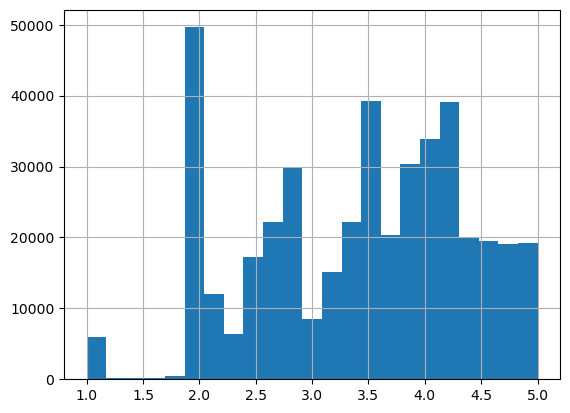

In [1204]:
train['condition'].hist(bins=23)

In [1205]:
tn = train[train['condition'].isna()]
tn.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
89,1999,mercedes,e300dt,NaN,NaN,automatic,wdbjf25h9xa799907,mi,NaN,219516.0,green,beige,warren toyota,400,Thu Dec 18 2014 13:10:00 GMT-0800 (PST),Dec,2014
122,2007,Suzuki,Reno,Base,Hatchback,automatic,kl5jd66z97k726834,il,NaN,127936.0,red,—,ray chevrolet inc,1800,Thu Dec 18 2014 14:00:00 GMT-0800 (PST),Dec,2014
298,2006,Chevrolet,Silverado 1500,LT3,Crew Cab,automatic,2gcek13t761205016,ne,NaN,231208.0,burgundy,gray,woodhouse ford inc,6000,Thu Dec 18 2014 11:00:00 GMT-0800 (PST),Dec,2014
303,2013,Kia,Sorento,LX,SUV,automatic,5xyktda60dg359259,il,NaN,31404.0,burgundy,—,world hyundai matteson,16500,Thu Dec 18 2014 10:00:00 GMT-0800 (PST),Dec,2014
326,2005,Jeep,Liberty,Sport,SUV,automatic,1j8gl48k25w621160,pa,NaN,102341.0,black,—,adcock brothers inc,4200,Fri Dec 19 2014 09:30:00 GMT-0800 (PST),Dec,2014


In [1206]:
tn['sellingprice'].describe()

count      9405.000000
mean       6521.257629
std        6806.088304
min         175.000000
25%        1900.000000
50%        4300.000000
75%        8800.000000
max      112000.000000
Name: sellingprice, dtype: float64

In [1207]:
sr =tn['sellingprice'].mean()

Средняя цена автомобилей с пропусками в столбце condition(состояние автомобиля на момент аукциона)
приблезительно в два раза ниже общей средней цены. Следовательно с этими автомобилими что то 
не так, что соответсвенно отражается на цене. Проверим другие столбцы в этом срезе.
Посмотрим марку, модель, тип кузова, трансмиссию, уровень отделки салона в этом срезе, если 
во всех вышеперечисленных столбцах будут пропуски то получивщийся срез лучше будет удалить.

In [1208]:
rr =tn[(tn['make'].isna())&(tn['model'].isna())&(tn['trim'].isna())&(tn['transmission'].isna())&(tn['body'].isna())].index.array
train = train.drop(index =rr)

Заполним пропуски в столбце condition(состояние автомобиля на момент аукциона) средним
значением из савокупности с равной  по средней ценовой категории совокупности с пропусками
в столбце condition т.к. было бы не правельно ссылаться на всю таблицу, ведь ранее проведенные
исследования средей цены показали, что средняя цена автомобиля с пропуском в столбце состояние
автомобиля почти в два раза ниже средней цены со всей таблицы. 

Напишем програму для вычисления среднего балласостояния автомобиля  совокупности
схожей по средней цене.

In [1209]:
wer = train[(~train['condition'].isna())]#срез таблицы где condition не равен 0
t=train['sellingprice'].max()# Максимальная цена 
while 1==1:#
    t = t - 1000# Сделаем шаг уменьшения цены на 1000
    ww = wer[wer['sellingprice']>t].index# индексы строк которые надо удалить для уменьшения средней цены
    wer = wer.drop(index=ww)# новая таблица с белее низкой ценой
    if sr>=wer['sellingprice'].mean():# когда средняя цена стоимости автомобиля(таблица со средней
        #с пропусками в столбце condition) поравняется со средней ценой новой савокупности
        #произойдет выход из цыкла. По результату мы булем иметь выборку из таблицы где средняя цена
        #сопостивима со средней ценой среза данных с пропусками в столбце condition.
        break
sred_c = wer['condition'].mean()#Находим средний бал состояния автомобиля

In [1210]:
sred_c = round(sred_c,1)
sred_c

2.8

In [1211]:
train['condition'].mean()

3.425076654186909

Видно что средний бал состояния автомобиля всей таблицы выше чем ср. бал сопоставимой совокупности.
Меняем пропуски в столбце condition на значение sred_c , округлив его до десятых.

In [1212]:
train['condition']=train['condition'].fillna(sred_c)

In [1213]:
train['condition'].unique()

array([4.2, 3.5, 2.2, 2.8, 2. , 2.5, 3.4, 4.8, 1.9, 1. , 3.1, 2.7, 3.6,
       2.9, 4.1, 2.6, 2.1, 3. , 4.9, 4.7, 4. , 3.3, 3.8, 3.7, 4.5, 4.6,
       5. , 4.3, 2.4, 2.3, 3.9, 3.2, 4.4, 1.4, 1.5, 1.7, 1.2, 1.3, 1.6,
       1.8, 1.1])

<Axes: >

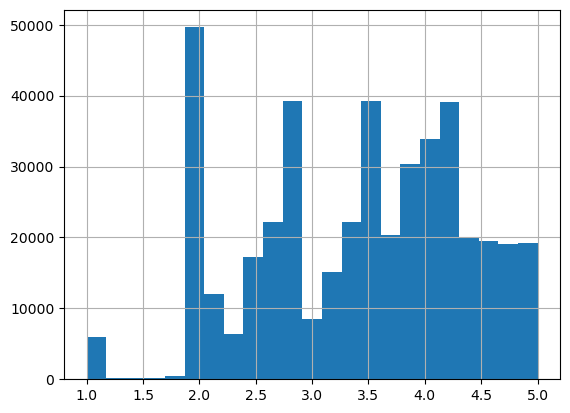

In [1214]:
train['condition'].hist(bins=23)

Посмотрим столбец year(год выпуска автомобиля).

In [1215]:
train['year'].unique()

array([2011, 2014, 2012, 2003, 2007, 2013, 2010, 2000, 2005, 2006, 2004,
       2008, 2009, 2015, 2002, 2001, 1999, 1998, 1996, 1997, 1994, 1995,
       1993, 1989, 1991, 1988, 1987, 1990, 1992, 1985, 1986, 1983, 1984,
       1982], dtype=int64)

In [1216]:
train['sellingprice'].mean()

13592.070621186584

In [1217]:
train[(train['condition']>4) & (train['sellingprice']<3000) & (train['year']>2009)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
26808,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j94eua96505,nj,4.4,20074.0,red,black,"ford motor credit company,llc",750,Wed Apr 08 2015 02:00:00 GMT-0700 (PDT),Apr,2015
136255,2010,NaN,NaN,NaN,NaN,NaN,knadh4b30a6706731,qc,4.2,99198.0,blue,gray,kia matane,2900,Tue Jun 16 2015 03:00:00 GMT-0700 (PDT),Jun,2015
199971,2011,Honda,Pilot,EX-L,SUV,automatic,5fnyf3h59bb025535,tx,4.1,1.0,white,gray,steve landers toyota,1100,Wed Jan 21 2015 02:20:00 GMT-0800 (PST),Jan,2015
208931,2014,Nissan,Versa,1.6 SV,Sedan,NaN,3n1cn7ap7el834928,in,4.2,1.0,black,black,"enterprise fleet management exchange, inc.",2100,Thu Jan 22 2015 04:30:00 GMT-0800 (PST),Jan,2015
316063,2014,Dodge,Challenger,R/T,Coupe,manual,2c3cdybt0eh290044,ga,4.6,1.0,gray,gray,easy car leasing llc dba brac of birmingham,1200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),Jan,2015
348111,2014,GMC,Sierra 1500,SLE,Crew Cab,automatic,3gtu2uec3eg107021,oh,4.4,48706.0,black,gray,bobb automotive inc,2000,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),Feb,2015


In [1218]:
tt = train[(train['condition']>4) & (train['sellingprice']<3000) & (train['year']>2009)].index
tt = tt.array

In [1219]:
tt

<PandasArray>
[26808, 136255, 199971, 208931, 316063, 348111]
Length: 6, dtype: int64

Удалим подозрительные строки из таблицы. Цена этих автомобилей была слишком занижена,
но состояние их хорошее, год свежий(новая машина), показание спидометра у некоторых
автомобилей сравнительно не большое, у трех автомобилей 1 миля(по идее автомобиль
должен быть новый). Соответственно стоить эти автомобили так дешево не могут 
по всей видимости это выбросы.

In [1220]:
train = train.drop(index = tt)

In [1221]:
#train['saledate'] = pd.to_datetime(train['saledate'], format='%Y-%m-%dT%H:%M:%S')
#train['saledate_year'] = train['saledate'].dt.year
#train.head(2)

Проверим столбец показания спидометра.

In [1222]:
train['odometer'].describe()

count    440147.000000
mean      68342.496157
std       53540.691710
min           1.000000
25%       28258.000000
50%       52097.000000
75%       99270.000000
max      999999.000000
Name: odometer, dtype: float64

In [1223]:
train[train['odometer']==1]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
125,2000,Jeep,Cherokee,Sport,SUV,automatic,1j4ff48s5yl232779,ny,3.1,1.0,blue,gray,morehead auto sales inc,300,Wed Jan 21 2015 01:00:00 GMT-0800 (PST),Jan,2015
212,2007,GMC,Yukon,SLE,SUV,automatic,1gkfc13027r215974,tx,2.1,1.0,black,black,shamaley buick gmc,10000,Thu Jan 22 2015 04:00:00 GMT-0800 (PST),Jan,2015
270,2000,Nissan,Altima,GXE,Sedan,automatic,1n4dl01d1yc126300,nv,2.0,1.0,black,—,titlemax of eastern ave. - nv 7,800,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),Mar,2015
788,2013,Hyundai,Accent,GLS,Sedan,automatic,kmhct4ae0du540075,az,1.0,1.0,red,gray,enterprise vehicle exchange / tra / rental / t...,4700,Wed Jan 07 2015 11:00:00 GMT-0800 (PST),Jan,2015
993,1997,Toyota,Camry,XLE,Sedan,automatic,4t1bg22k3vu120790,ga,2.0,1.0,beige,tan,capital auto auction,1000,Thu Feb 19 2015 04:30:00 GMT-0800 (PST),Feb,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438289,2002,Acura,RL,3.5,Sedan,automatic,jh4ka96592c000060,mo,1.9,1.0,black,tan,hendrick lexus kansas city,1400,Wed Dec 31 2014 10:30:00 GMT-0800 (PST),Dec,2014
439216,1999,oldsmobile,intrigue,base,NaN,automatic,1g3ws52h6xf364032,sc,2.8,1.0,green,beige,thomas auto sales inc,500,Thu Dec 18 2014 10:15:00 GMT-0800 (PST),Dec,2014
439366,2002,Toyota,Camry,SE,Sedan,NaN,jtdbe32k120127949,il,2.8,1.0,gray,—,grossinger city toyota,2850,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),Dec,2014
439525,2005,Nissan,Quest,3.5 SE,Minivan,automatic,5n1bv28u05n119542,fl,2.4,1.0,red,—,mid atlantic finance/clearwater,4500,Thu Jun 18 2015 09:50:00 GMT-0700 (PDT),Jun,2015


In [1224]:
train[train['odometer']<100]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
125,2000,Jeep,Cherokee,Sport,SUV,automatic,1j4ff48s5yl232779,ny,3.1,1.0,blue,gray,morehead auto sales inc,300,Wed Jan 21 2015 01:00:00 GMT-0800 (PST),Jan,2015
212,2007,GMC,Yukon,SLE,SUV,automatic,1gkfc13027r215974,tx,2.1,1.0,black,black,shamaley buick gmc,10000,Thu Jan 22 2015 04:00:00 GMT-0800 (PST),Jan,2015
270,2000,Nissan,Altima,GXE,Sedan,automatic,1n4dl01d1yc126300,nv,2.0,1.0,black,—,titlemax of eastern ave. - nv 7,800,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),Mar,2015
335,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap3fc204863,tx,5.0,55.0,white,black,rlb investments,16800,Wed Jun 17 2015 03:20:00 GMT-0700 (PDT),Jun,2015
696,2013,Nissan,Pathfinder,SV,SUV,automatic,5n1ar2mm5dc683378,ca,5.0,7.0,silver,gray,nissan north america inc.,25750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST),Mar,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439309,2015,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk5fu496335,fl,2.5,2.0,silver,black,florida auto financial group,29400,Tue Jul 07 2015 06:10:00 GMT-0700 (PDT),Jul,2015
439366,2002,Toyota,Camry,SE,Sedan,NaN,jtdbe32k120127949,il,2.8,1.0,gray,—,grossinger city toyota,2850,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),Dec,2014
439525,2005,Nissan,Quest,3.5 SE,Minivan,automatic,5n1bv28u05n119542,fl,2.4,1.0,red,—,mid atlantic finance/clearwater,4500,Thu Jun 18 2015 09:50:00 GMT-0700 (PDT),Jun,2015
439582,2015,Hyundai,Equus,Signature,Sedan,automatic,kmhgh4jh5fu100319,tx,5.0,28.0,black,black,hyundai motor america/co car,46200,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT),Jun,2015


In [1225]:
train[train['odometer'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
36557,2002,Ford,Windstar,LX Standard,Minivan,automatic,2fmza51442ba27119,fl,2.8,NaN,beige,tan,champion auto wholesale inc,700,Wed Dec 17 2014 15:15:00 GMT-0800 (PST),Dec,2014
42825,1997,Toyota,Camry,CE,Sedan,automatic,4t1bg22k6vu171913,nj,2.8,NaN,gold,—,american bodywork & collision,1000,Wed Dec 17 2014 09:30:00 GMT-0800 (PST),Dec,2014
45516,2010,NaN,NaN,NaN,NaN,automatic,1gb6g3bg6a1146243,ny,2.8,NaN,white,gray,denooyer chevrolet inc,4900,Thu Dec 18 2014 12:45:00 GMT-0800 (PST),Dec,2014
46266,2001,Ford,Mustang,Deluxe,Convertible,automatic,1fafp44481f128016,az,2.8,NaN,white,—,chapman honda,500,Wed Dec 17 2014 13:30:00 GMT-0800 (PST),Dec,2014
60990,2014,Ford,Fiesta,ST,Hatchback,manual,3fadp4gx4em185929,ga,4.6,NaN,black,black,carworks inc,28650,Tue Mar 24 2015 02:30:00 GMT-0700 (PDT),Mar,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421174,2002,Jeep,Liberty,Limited,SUV,NaN,1j4gl58k52w245833,ny,2.8,NaN,blue,—,fuccillo kia,500,Thu Dec 18 2014 12:45:00 GMT-0800 (PST),Dec,2014
422491,2001,Pontiac,Aztek,Base,SUV,NaN,3g7da03e01s536980,az,2.8,NaN,red,—,tio rico te ayuda-anfs inc,725,Thu Dec 18 2014 11:00:00 GMT-0800 (PST),Dec,2014
422735,2014,Volkswagen,Jetta,SE PZEV,Sedan,manual,3vwb17aj8em362939,il,4.4,NaN,white,black,st charles chrysler dodge jeep inc,11700,Thu Jul 02 2015 07:00:00 GMT-0700 (PDT),Jul,2015
423407,1998,Pontiac,Sunfire,SE,Coupe,automatic,1g2jb1246w7570058,il,2.8,NaN,orange,—,b & m auto sales inc,400,Thu Dec 18 2014 10:00:00 GMT-0800 (PST),Dec,2014


Строки где пробег автомобиля 1 миля по всей видимости выбросы, их необходимо заменить
не средний пробег согласно году автомобиля, пропуски тоже заменим средним колличеством
согласно году.

In [1226]:
train['odometer'] = train['odometer'].fillna(0)

In [1227]:
train[train['odometer'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year


In [1228]:
years = train.groupby('year')['odometer'].mean()
for i in years.index:
    train.loc[(train['odometer']==1)&(train['year']==i), 'odometer'] =  years[i]

In [1229]:
train[train['odometer']==1]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year


<Axes: xlabel='year'>

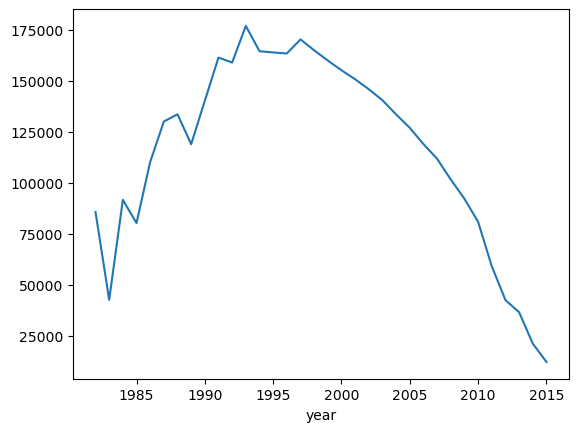

In [1230]:
years.plot()

Зависимость пробега от года выпуска близко к нормальному распределению, что в полне логично
т.к. автомобиль отчень старые по этому и сохранились что мало проехали, а автомобили недавно
выпушеные тоже проехали не много, в ценоре пик значений, чего и следовало ожидать.

## Поиступим к изучению столбцов с категорияльными значениями.

Проверим есть ли стороки с ропусками пяти главных(марка, модель, тип кузова, отделка, тип ртансмисии) 
столбцов, если такие есть их лучше удалить.

In [1231]:
delet =train[(train['make'].isna())&(train['model'].isna())&(train['trim'].isna())&\
             (train['transmission'].isna())&(train['body'].isna())].index.array
train = train.drop(index =delet)

In [1232]:
train.isna().sum()

year                0
make             6657
model            6737
trim             6951
body             9007
transmission    50074
vin                 0
state               0
condition           0
odometer            0
color             582
interior          582
seller              0
sellingprice        0
saledate            0
month               0
sele_year           0
dtype: int64

Чтобы заполнить пропуски в столбце марка автомобиля воспользуемся справочной 
информацией, и используя первые три символа винкода установим марку.

Напишем функцию для заполнения пропусков в столбце марка автомобиля.

In [1233]:
def make(row):
    vin = row['vin'][:3]
    try:
        if  '1fm'  == vin:
            return 'Ford'
        elif '2ft' == vin:
            return 'Ford'
        elif '1ft' == vin:
            return 'Ford'
        elif '3ft' == vin:
            return 'Ford'
        elif '4ft' == vin:
            return 'Ford'
        elif '5ft' == vin:
            return 'Ford'
        elif 'sal' == vin:
            return 'Land Rover'
        elif '2a4' == vin:
            return 'Chrysler'
        elif 'jm1' == vin:
            return 'Mazda'
        elif '3gn' == vin:
            return 'Chevrolet'
        elif '4a3' == vin:
            return 'MITSUBISHI'
        elif '1ft' == vin:
            return 'Ford'
        elif 'wba' == vin:
            return 'BMW'
        elif 'jtj' == vin:
            return 'LEXUS'
        elif '1g1' == vin:
            return 'CHEVROLET'
        elif '1j4' == vin:
            return 'JEEP'
        elif '2hk' == vin:
            return 'HONDA'
        elif '2c4' == vin:
            return 'VOLKSWAGEN'
        elif '1gy' == vin:
            return 'CADILLAC'
        
        elif 'jm1' == vin:
            return 'MAZDA'
        elif '2c8' == vin:
            return 'CHRYSLER'
        elif 'jf1' == vin:
            return 'SUBARU'
        elif '2a4' == vin:
            return 'Chrysler'
        elif 'wdb' == vin:
            return 'MERCEDES-BENZ'
        elif '1fd' == vin:
            return 'Ford'
        
        elif 'jm3' == vin:
            return 'mazda'
        elif 'jn1' == vin:
            return 'INFINITI'
        elif '2g1' == vin:
            return 'PONTIAC'
        elif '1gb' == vin:
            return 'CHEVROLET'
        elif '2fa' == vin:
            return 'Ford'
        elif 'wp0' == vin:
            return 'PORSCHE'
        
        elif '2d4' == vin:
            return 'DODGE'
        elif '1gc' == vin:
            return 'CHEVROLET'
        elif '1g6' == vin:
            return 'CADILLAC'
        elif '1b4' == vin:
            return 'DODGE'
        elif '5fn' == vin:
            return 'Ford'
        elif '5tf' == vin:
            return 'TOYOTA'
        
        elif '1c4' == vin:
            return 'CHRYSLER'
        elif '1b3' == vin:
            return 'DODGE'
        elif '1gn' == vin:
            return 'CHEVROLET'
        elif '4t3' == vin:
            return 'TOYOTA'
        elif '2lm' == vin:
            return 'LINCOLN'
        elif '2gt' == vin:
            return 'CHEVROLET'
        elif '2d8' == vin:
            return 'Dodge'
        
        elif 'jh4' == vin:
            return 'ACURA'
        elif '2fm' == vin:
            return 'FORD'
        elif '2a8' == vin:
            return 'CHRYSLER'
        elif '1c3' == vin:
            return 'CHRYSLER'
        
        elif '2gc' == vin:
            return 'CHEVROLET'
        elif '2b4' == vin:
            return 'CHRYSLER'
        elif '3vw' == vin:
            return 'VOLKSWAGEN'
        elif '1fa' == vin:
            return 'Ford'
        
        
        #else:
        #    return 'wm'
    except:
         pass

In [1234]:
train.loc[(train['make'].isna()), 'make'] = train.apply(make, axis=1)


In [1235]:
sort_4 = train['make'].value_counts(normalize=True)
train.loc[train['make'].isin(sort_4[sort_4 < 0.0001].index), 'make'] = 'sss'
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST),Jan,2015
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST),Feb,2015
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST),Mar,2015
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST),Jan,2015


In [1236]:
train.isna().sum()   

year                0
make              780
model            6737
trim             6951
body             9007
transmission    50074
vin                 0
state               0
condition           0
odometer            0
color             582
interior          582
seller              0
sellingprice        0
saledate            0
month               0
sele_year           0
dtype: int64

In [1237]:
#train[train['make'].isna()]['vin'].map(lambda x: str(x)[:3]).value_counts(sort=True)[:15]

In [1238]:
#vin = train[train['make'].isna()]['vin'].map(lambda x: str(x)[:3])#.unique()
#len(vin)
#vin.value_counts(sort=False).to_dict()

In [1239]:
#vin3 = train[train['make'].isna()]['vin'].map(lambda x: str(x)[:17])
#vin3.array

In [1240]:
#for i in vin3.array:
#    if i[:3]=='2d8':
#        print(i)

Посмотрим уникальные значения марка автомобиля.

In [1241]:
train['make'].unique()

array(['Ford', 'Nissan', 'HUMMER', 'Lincoln', 'sss', 'Hyundai', 'TOYOTA',
       'Buick', 'Chevrolet', 'Honda', 'Acura', 'Cadillac', 'GMC', 'Saab',
       'Dodge', 'Mercedes-Benz', 'Toyota', 'Volkswagen', 'Mazda', 'BMW',
       'Infiniti', 'Chrysler', 'Kia', 'CHEVROLET', 'Jaguar', 'Subaru',
       'Jeep', 'Lexus', 'mercedes', 'Scion', 'FIAT', 'Suzuki',
       'Land Rover', 'Volvo', 'Audi', None, 'MINI', 'Isuzu', 'Mitsubishi',
       'JEEP', 'smart', 'Pontiac', 'Porsche', 'subaru', 'ford',
       'chrysler', 'Saturn', 'mazda', 'dodge', 'Ram', 'Oldsmobile',
       'CHRYSLER', 'Mercury', 'PORSCHE', 'Bentley', 'DODGE', 'MITSUBISHI',
       'toyota', 'MERCEDES-BENZ', 'CADILLAC', 'SUBARU', 'VOLKSWAGEN',
       'nissan', 'LEXUS', 'chevrolet', 'HONDA', 'honda', 'mitsubishi',
       'PONTIAC', 'lexus', 'bmw', 'Maserati', 'INFINITI', 'LINCOLN',
       'jeep', 'cadillac', 'land rover'], dtype=object)

Приведем содержимое столбца марка автомобиля к нижнему регистру.

In [1242]:
train['make'] = train['make'].str.lower()

Изучим столбец модель автомобиля.

In [1243]:
train.isna().sum()

year                0
make              780
model            6737
trim             6951
body             9007
transmission    50074
vin                 0
state               0
condition           0
odometer            0
color             582
interior          582
seller              0
sellingprice        0
saledate            0
month               0
sele_year           0
dtype: int64

In [1244]:
train['model'].unique()

array(['Edge', 'Fusion', 'Sentra', 'H2', 'MKZ', 'g6', 'Escape', 'Elantra',
       'Freestyle', nan, 'Lucerne', 'Windstar', 'Silverado 1500',
       'Murano', 'Equinox', 'Accord', 'Civic', 'MDX', 'CTS', 'Taurus',
       'SRX', 'Yukon', '9-3', 'Explorer', 'F-150', 'Charger', 'Armada',
       'GL-Class', 'Avalon', 'Tahoe', 'Malibu', 'Passat', 'Camry', 'Flex',
       '3 Series', 'Q50', 'Altima', 'Mustang', '300', 'Sonata',
       'Envoy XL', 'Rogue', 'Accent', 'Maxima', 'Forte', 'XF', 'Outback',
       'Grand Caravan', 'E-Class', 'Cherokee', 'Impala', 'Optima',
       '5 Series', 'Expedition', 'IS 250', 'MKS', '200', 'Veloster',
       'Golf', 'RAV4', 'e300dt', 'Five Hundred', 'G Coupe',
       'Grand Cherokee', 'X-Type', 'G Convertible', 'Tacoma', 'xA',
       'G Sedan', 'TL', 'Liberty', 'Soul', '500L', 'Town and Country',
       'HHR', 'Wrangler', 'Reno', 'Suburban', 'PT Cruiser', 'GX 460',
       'Sienna', 'SL-Class', 'Envoy', 'Patriot', 'E-Series Van', 'Versa',
       'Aspen', 'M', 'Co

Приведем столбец model к нижнему регистру.

In [1245]:
train['model'] = train['model'].str.lower()

Посмотрим частоту встречаимости моделей.

In [1246]:
train['model'].value_counts(sort=True)#[:50]

altima            15454
f-150             11408
fusion            10244
camry             10000
escape             9446
                  ...  
420-class             1
c230                  1
rrs                   1
activehybrid 5        1
g500                  1
Name: model, Length: 839, dtype: int64

Удалим строки с редко встречающиеся моделями.

In [1247]:
sort = train['model'].value_counts(normalize=True)
train.loc[train['model'].isin(sort[sort < 0.0001].index), 'model'] = 'nm'
train[train['model']=='nm']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
89,1999,mercedes,nm,NaN,NaN,automatic,wdbjf25h9xa799907,mi,2.8,219516.0,green,beige,warren toyota,400,Thu Dec 18 2014 13:10:00 GMT-0800 (PST),Dec,2014
106,2006,scion,nm,Base,hatchback,automatic,jtkkt624460165781,fl,2.9,145683.0,green,black,courtesy toyota of brandon,3000,Thu Jun 04 2015 09:20:00 GMT-0700 (PDT),Jun,2015
122,2007,suzuki,nm,Base,Hatchback,automatic,kl5jd66z97k726834,il,2.8,127936.0,red,—,ray chevrolet inc,1800,Thu Dec 18 2014 14:00:00 GMT-0800 (PST),Dec,2014
186,2012,acura,nm,Technology Package,tsx sport wagon,automatic,jh4cw2h6xcc002694,ca,4.4,23212.0,burgundy,white,l m auto wholesale,22250,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),Jun,2015
449,2007,mercedes,nm,NaN,NaN,automatic,wdbrf52h27a941460,fl,3.9,128072.0,black,black,coggin chevrolet at the avenues,6400,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439822,2008,bmw,nm,750i,NaN,NaN,wbahl83598dt14375,pa,4.3,93481.0,black,black,adcock brothers inc,17400,Fri Jan 02 2015 09:00:00 GMT-0800 (PST),Jan,2015
440185,2000,kia,nm,Base,Sedan,automatic,knafb1219y5887951,fl,1.9,97251.0,silver,beige,hertz remarketing,400,Thu Feb 05 2015 01:35:00 GMT-0800 (PST),Feb,2015
440192,2003,mazda,nm,Base,Wagon,automatic,jm1bj245331133177,fl,3.6,80407.0,silver,black,nicholas financial inc/clearwater,3500,Thu Feb 26 2015 07:00:00 GMT-0800 (PST),Feb,2015
440195,2012,ram,nm,Base,minivan,automatic,2c4jdgag6cr279879,nc,4.3,103590.0,white,black,lease plan usa,8300,Tue Jun 02 2015 02:15:00 GMT-0700 (PDT),Jun,2015


Посотрим на стороки с пропусками в слолбце модель автомобиля, может быть
удастся заметить какую нибуть закономерность при первом осмотре.

In [1248]:
train[train['model'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
10,2007,toyota,NaN,NaN,NaN,automatic,5tfbv54157x019560,ca,3.1,102507.0,blue,gray,aaero sweet company,17250,Thu Jan 29 2015 03:30:00 GMT-0800 (PST),Jan,2015
42,2007,mazda,NaN,NaN,NaN,manual,jm1bk34l671745431,md,2.8,92656.0,blue,gray,credit acceptance corp/vrs/southfield,5600,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),Jun,2015
63,2011,ford,NaN,NaN,NaN,automatic,1fdne1bw5bda64735,ga,5.0,67159.0,white,gray,"vpsi, inc",13200,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT),Jun,2015
64,2008,chevrolet,NaN,NaN,NaN,automatic,1gbdv13wx8d142776,ca,4.1,113582.0,white,gray,wholesale motor sales inc,4100,Thu Feb 05 2015 04:00:00 GMT-0800 (PST),Feb,2015
111,2006,chevrolet,NaN,NaN,NaN,automatic,3gnda13d36s611801,nv,2.8,129019.0,orange,gray,credit acceptance corp/vrs/southfield,2900,Thu Feb 05 2015 04:00:00 GMT-0800 (PST),Feb,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440085,2011,ford,NaN,NaN,NaN,automatic,1fdne1bw8bdb21610,az,3.5,80594.0,white,gray,mike albert fleet solutions,11100,Wed Feb 04 2015 03:00:00 GMT-0800 (PST),Feb,2015
440114,2011,None,NaN,NaN,NaN,automatic,2lnbl8ev9bx757689,nj,3.5,134164.0,—,black,merchants automotive group,11800,Wed Mar 04 2015 01:30:00 GMT-0800 (PST),Mar,2015
440118,2004,cadillac,NaN,NaN,NaN,automatic,1gyde637240130408,md,3.5,123123.0,white,beige,credit acceptance corp/vrs/southfield,3400,Tue Feb 17 2015 01:30:00 GMT-0800 (PST),Feb,2015
440122,2007,land rover,NaN,NaN,NaN,automatic,salme15487a251642,ca,2.5,39545.0,black,black,hornburg jaguar,17750,Wed Jun 17 2015 05:15:00 GMT-0700 (PDT),Jun,2015


На первый выявленно, что пропуски в столбце  модель автомобиля совпадают с пропусками в
втолбцах тип кузова и уровень отделки кузова. Для повышения качества данных для обучения
модели удалим строки с пропусками в столбце модель автомобиля. 

In [1249]:
train.dropna(subset = ['model'], inplace=True)

In [1250]:
train.isna().sum()

year                0
make                0
model               0
trim              294
body             2350
transmission    50070
vin                 0
state               0
condition           0
odometer            0
color             567
interior          567
seller              0
sellingprice        0
saledate            0
month               0
sele_year           0
dtype: int64

Изучим столбец trim(уровень отделки автомобиля).

Приведем столбец trim к нижниму регистру.

In [1251]:
train['trim'] = train['trim'].str.lower()

In [1252]:
t = train['trim'].unique(); len(t)

1850

In [1253]:
for i in t:#print('\n'.join(map(str, t)))#print(*t, sep='\n')
    print(i, end = ',   ')

sel,   se,   2.0 sl,   base,   4c,   gls,   limited,   cxl,   ls,   sl,   lt,   lx,   luxury,   denali,   2.0t,   xlt,   sxt,   le,   gl450 4matic,   eddie bauer,   titanium,   sport,   work truck,   328i,   ltz,   premium,   2.5,   v6,   slt,   sv,   3.5 s,   2.5 s,   s,   2.5i premium pzev,   e350 sport 4matic,   sho,   latitude,   535i xdrive,   el king ranch,   turbo,   gls 1.8t,   nan,   lt fleet,   g37,   laredo,   3.0l,   xle,   ex,   prerunner v6,   g37 journey,   !,   pop,   lxi,   gt premium,   xl,   ltz 1500,   ex v6,   srt8,   le 8-passenger,   sl550,   e-250,   1.8 s,   lt 1500,   m37x,   s v6,   2.5l pzev,   1lt,   cx,   le 7-passenger mobility auto access,   executive,   135i,   1500 ls,   warner brothers,   grand touring,   ls fleet,   t5 drive-e,   x,   tdi premium plus quattro,   technology package,   touring-l,   xls,   touring,   sr5,   g37x,   750li,   ve,   3.6 premium quattro,   sle,   ss,   3.0i,   mainstreet,   550i xdrive,   unlimited x,   ii,   s all4,   unli

Очень большое кол-во уровней отделок, но цена автомобиля косвенно зависит от
уровня отделки. Посмотрим на первые 30 наиболее встречающихся уровней отделок
в данных, и последне 30

In [1254]:
train['trim'].value_counts(sort=True)[:30]

base        43876
se          34498
lx          16511
limited     14516
lt          13431
xlt         13173
ls          10723
le          10231
gls          9707
s            9649
2.5 s        9029
sxt          8859
touring      8790
sel          8264
sport        7575
ex           7535
2.5          5466
slt          4737
sv           4609
ex-l         4240
ltz          4120
xl           3319
g37x         3275
v6           3038
3.5 sv       2878
sl           2772
328i         2672
lariat       2641
titanium     2379
1lt          2333
Name: trim, dtype: int64

Посмотрим на последние по частоте  30 значений столбца уровень отделки салона.  

In [1255]:
train['trim'].value_counts(sort=True)[1820:]

ewb                    1
awd x w/prem           1
rover                  1
cl65 amg               1
b7 lwb                 1
2.5t se                1
xj6l                   1
cargo awd w/yf7        1
b4000 se               1
25 4x4 cr sle          1
cherokee 4x4 laredo    1
3.0 r limited          1
exec gt                1
sport sport            1
2.5l blush edition     1
4x4 ext classic ls     1
sub 4x4 v8             1
400sel                 1
gr tr gr touring       1
fwd ext                1
city 2                 1
lux sulev              1
4x4 v8 sle             1
premium plus           1
duro cross v6          1
cherokee limited       1
4x2 v8 lt              1
xle touring se         1
4x4 v6 xlt sport       1
Name: trim, dtype: int64

Посмотрим на пропуски в столбце trim, попытаемся найти какую нибуть
закономерность.

In [1256]:
train[train['trim'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
89,1999,mercedes,nm,NaN,NaN,automatic,wdbjf25h9xa799907,mi,2.8,219516.0,green,beige,warren toyota,400,Thu Dec 18 2014 13:10:00 GMT-0800 (PST),Dec,2014
449,2007,mercedes,nm,NaN,NaN,automatic,wdbrf52h27a941460,fl,3.9,128072.0,black,black,coggin chevrolet at the avenues,6400,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),Dec,2014
779,2007,mercedes,nm,NaN,NaN,automatic,wdbrf52hx7f895279,fl,2.4,99813.0,black,black,autonation honda miami lakes,6000,Tue Jan 06 2015 01:15:00 GMT-0800 (PST),Jan,2015
1545,2007,mazda,cx-7,NaN,NaN,automatic,jm3er293570157383,nc,2.1,58908.0,black,black,primeritus remarketing/atlas,5100,Mon Dec 22 2014 09:30:00 GMT-0800 (PST),Dec,2014
7826,2005,sss,rl,NaN,NaN,automatic,jh4kb16545c012975,nc,3.7,198612.0,silver,black,hendrick buick gmc cadillac,3700,Mon Dec 22 2014 09:30:00 GMT-0800 (PST),Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436814,2004,nissan,350z,NaN,NaN,automatic,jn1az34e94t051652,mo,2.7,89552.0,black,black,plaza motor company,7800,Tue Dec 23 2014 11:00:00 GMT-0800 (PST),Dec,2014
436994,2000,chevrolet,camaro,NaN,NaN,automatic,2g1fp22k2y2163395,ca,2.0,66912.0,red,gray,jimmie johnson kearny mesa chevrolet,2800,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014
438188,2003,mercedes,nm,NaN,NaN,automatic,wdcyr49e23x141978,ca,3.6,125722.0,silver,black,illest motors,24000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,2014
438210,2004,mazda,nm,NaN,NaN,manual,jm1fe173940100069,tx,2.3,74558.0,gray,black,united auto credit/hurst,1200,Tue Jan 06 2015 11:00:00 GMT-0800 (PST),Jan,2015


In [1257]:
train[train['trim'].isna()&train['body'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
89,1999,mercedes,nm,NaN,NaN,automatic,wdbjf25h9xa799907,mi,2.8,219516.0,green,beige,warren toyota,400,Thu Dec 18 2014 13:10:00 GMT-0800 (PST),Dec,2014
449,2007,mercedes,nm,NaN,NaN,automatic,wdbrf52h27a941460,fl,3.9,128072.0,black,black,coggin chevrolet at the avenues,6400,Thu Dec 18 2014 13:00:00 GMT-0800 (PST),Dec,2014
779,2007,mercedes,nm,NaN,NaN,automatic,wdbrf52hx7f895279,fl,2.4,99813.0,black,black,autonation honda miami lakes,6000,Tue Jan 06 2015 01:15:00 GMT-0800 (PST),Jan,2015
1545,2007,mazda,cx-7,NaN,NaN,automatic,jm3er293570157383,nc,2.1,58908.0,black,black,primeritus remarketing/atlas,5100,Mon Dec 22 2014 09:30:00 GMT-0800 (PST),Dec,2014
7826,2005,sss,rl,NaN,NaN,automatic,jh4kb16545c012975,nc,3.7,198612.0,silver,black,hendrick buick gmc cadillac,3700,Mon Dec 22 2014 09:30:00 GMT-0800 (PST),Dec,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436814,2004,nissan,350z,NaN,NaN,automatic,jn1az34e94t051652,mo,2.7,89552.0,black,black,plaza motor company,7800,Tue Dec 23 2014 11:00:00 GMT-0800 (PST),Dec,2014
436994,2000,chevrolet,camaro,NaN,NaN,automatic,2g1fp22k2y2163395,ca,2.0,66912.0,red,gray,jimmie johnson kearny mesa chevrolet,2800,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,2014
438188,2003,mercedes,nm,NaN,NaN,automatic,wdcyr49e23x141978,ca,3.6,125722.0,silver,black,illest motors,24000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,2014
438210,2004,mazda,nm,NaN,NaN,manual,jm1fe173940100069,tx,2.3,74558.0,gray,black,united auto credit/hurst,1200,Tue Jan 06 2015 11:00:00 GMT-0800 (PST),Jan,2015


В столбце trim пропуски поностью совпадают в пропусками в столбце body, т. к. 
востановить, или заполнить их наиболее подходящими значениями нет возможности
из-за недостатка времяни удалим их.

In [1258]:
train.dropna(subset = ['trim'], inplace=True)

Проанализируем на колли-во одинаковых значений в столбце trim (таблица trim
колонка count_sellingprice), расположим их по убыванию. Самый частый уровень
отделки автомобиля - base, около 10% данных.

In [1259]:
trim = train.pivot_table(index='trim', values='sellingprice', aggfunc=['mean','count'])#.sort_values(by=['sellingprice'], axis=0, ascending=False)#[:30]
trim.columns = ['mean_sellingprice','count_sellingprice']
trim.sort_values(by=['count_sellingprice'], axis=0, ascending=False)[:50]

,mean_sellingprice,count_sellingprice
trim,,
base,13819.751664,43876
se,11212.039481,34498
lx,10295.250257,16511
limited,16592.563309,14516
lt,13701.809471,13431
xlt,15609.222804,13173
ls,7391.895458,10723
le,10464.955625,10231
gls,9313.424127,9707


Проанализируем среднию цену по каждому значению  уровнюня отделки столбец
mean_sellingprice. Расположим их по убыванию. Самая высокая средняя цена по 
уровеню отделки автомобиля - ewb, одна в таблице - это оделка салона Rolls-
Royce Phantom EWB, следующее значение Alfa Romeo Spider.

In [1260]:
trim.sort_values(by=['mean_sellingprice'], axis=0, ascending=False)[:50]

,mean_sellingprice,count_sellingprice
trim,,
ewb,169000.000000,1
spider f1,117000.000000,1
g63 amg,112762.500000,20
spyder,112625.000000,4
s63 amg 4matic,112200.000000,5
supercharged lwb,110714.285714,7
4.2 quattro spyder,102000.000000,1
5.2 quattro,101700.000000,10
5.2 quattro spyder,97750.000000,4


In [1261]:
trim.sort_values(by=['mean_sellingprice'], axis=0, ascending=False)[1780:]

,mean_sellingprice,count_sellingprice
trim,,
cher 4x2 v8 limited,700.000000,1
level i,700.000000,2
cher 4x4 v8 laredo,691.666667,3
jxi,675.714286,35
diamond edition,675.000000,2
...,...,...
olympic gold,300.000000,1
caravan,300.000000,1
fwd ext,300.000000,1


In [1262]:
train[train['trim']=='!']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
114,2010,kia,soul,!,Wagon,automatic,kndjt2a28a7133671,fl,3.6,49074.0,green,black,remarketing by ge/space coast credit union,9500,Wed Jan 21 2015 01:00:00 GMT-0800 (PST),Jan,2015
1630,2011,kia,soul,!,Wagon,automatic,kndjt2a24b7255302,ma,3.1,74229.0,green,black,capital one auto finance,7300,Tue Mar 03 2015 01:30:00 GMT-0800 (PST),Mar,2015
1742,2011,kia,soul,!,Wagon,automatic,kndjt2a29b7322203,mo,4.4,45840.0,white,black,ramsey pontiac corp,10900,Wed Feb 04 2015 02:30:00 GMT-0800 (PST),Feb,2015
2493,2011,kia,soul,!,Wagon,automatic,kndjt2a29b7240858,ca,2.3,76468.0,gray,black,v/m auto broker,9100,Tue Jan 27 2015 04:30:00 GMT-0800 (PST),Jan,2015
2817,2010,kia,soul,!,Wagon,automatic,kndjt2a22a7138932,fl,2.0,77590.0,gray,gray,d&a fine cars,9000,Tue Mar 03 2015 01:20:00 GMT-0800 (PST),Mar,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434764,2011,kia,soul,!,Wagon,NaN,kndjt2a27b7254595,pa,4.7,39337.0,black,black,daniel thomas sales,10700,Fri May 29 2015 02:00:00 GMT-0700 (PDT),May,2015
436698,2011,kia,soul,!,Wagon,automatic,kndjt2a26b7291895,pa,2.3,53166.0,red,black,pohanka lexus,9600,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),Feb,2015
437653,2011,kia,soul,!,Wagon,automatic,kndjt2a2xb7299420,ma,2.8,38897.0,silver,black,boch new to you superstore,8300,Tue Jan 13 2015 10:00:00 GMT-0800 (PST),Jan,2015
439299,2011,kia,soul,!,Wagon,automatic,kndjt2a26b7344174,fl,4.2,47312.0,green,black,chiefland chrys dodge jeep inc,10600,Thu Feb 26 2015 02:15:00 GMT-0800 (PST),Feb,2015


Чтобы избежать ошибок при порядковом кодировании необходимо изменить редко встречающиеся
значение типы отделок на более по подходящие для этого столбца, так как уровень отделки
это просто разные версии модели то в редко встречающихся моделей всеравно не много, а где
то например ролс-ройс вообще одна.

In [1263]:
sort1 = train['trim'].value_counts(normalize=True)
train.loc[train['trim'].isin(sort1[sort1 < 0.0001].index), 'trim'] = 'SSS'
sort1

base                0.101609
se                  0.079891
lx                  0.038236
limited             0.033616
lt                  0.031104
                      ...   
duro cross v6       0.000002
cherokee limited    0.000002
4x2 v8 lt           0.000002
xle touring se      0.000002
4x4 v6 xlt sport    0.000002
Name: trim, Length: 1849, dtype: float64

In [1264]:
train.loc[(train['trim']=='SSS'), 'trim']=train['model']

In [1265]:
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015
1,2014,ford,fusion,se,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015
4,2007,ford,fusion,sel,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,kia,optima,optima,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST),Jan,2015
440232,2014,mini,cooper countryman,s all4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST),Feb,2015
440233,2008,bmw,6 series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST),Mar,2015
440234,2014,ram,2500,slt,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST),Jan,2015


In [1266]:
trim = train.pivot_table(index='trim', values='sellingprice', aggfunc=['mean','count'])
trim.columns = ['mean_sellingprice','count_sellingprice']
trim.sort_values(by=['count_sellingprice'], axis=0, ascending=False)[:5]

,mean_sellingprice,count_sellingprice
trim,,
base,13819.751664,43876
se,11212.039481,34498
lx,10295.250257,16511
limited,16592.563309,14516
lt,13701.809471,13431


In [1267]:
trim.sort_values(by=['count_sellingprice'], axis=0, ascending=False)#[727:]

,mean_sellingprice,count_sellingprice
trim,,
base,13819.751664,43876
se,11212.039481,34498
lx,10295.250257,16511
limited,16592.563309,14516
lt,13701.809471,13431
...,...,...
200,12000.000000,1
s40,12900.000000,1
s4,8000.000000,1


In [1268]:
train['trim'].value_counts(sort=True)#[:50]#.unique()

base            43876
se              34498
lx              16511
limited         14516
lt              13431
                ...  
sable               1
savana cargo        1
sportage            1
x3                  1
cayman              1
Name: trim, Length: 785, dtype: int64

In [1269]:
sort1 = train['trim'].value_counts(normalize=True)
train.loc[train['trim'].isin(sort1[sort1 < 0.0001].index), 'trim'] = 'sss'


Изучим столбец трансмиссия.

In [1270]:
train['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

Посмотрим на данные с пропуском в столбце transmission (тип коробки передач).

In [1271]:
train[train['transmission'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
13,2006,chevrolet,silverado 1500,ls,Extended Cab,NaN,1gcek19bx6z269153,tx,2.2,166999.0,white,gray,texas direct auto,6700,Wed Feb 25 2015 02:20:00 GMT-0800 (PST),Feb,2015
27,2014,dodge,charger,sxt,Sedan,NaN,2c3cdxhg0eh267271,va,4.0,21631.0,blue,black,hertz corporation/gdp,18100,Thu Feb 12 2015 00:45:00 GMT-0800 (PST),Feb,2015
31,2012,mercedes-benz,gl-class,gl450 4matic,SUV,NaN,4jgbf7be8ca797360,ga,4.1,55612.0,white,brown,mercedes-benz finc wholesale advantage,30750,Wed Feb 04 2015 02:00:00 GMT-0800 (PST),Feb,2015
49,2007,chevrolet,silverado 1500,ltz,Crew Cab,NaN,2gcek13m171647736,ga,2.2,108799.0,blue,—,td auto finance,15200,Thu Jan 08 2015 10:00:00 GMT-0800 (PST),Jan,2015
53,2013,ford,mustang,v6,Convertible,NaN,1zvbp8em0d5237253,pa,3.5,67478.0,blue,black,northeast leasing,11600,Fri Mar 13 2015 02:00:00 GMT-0700 (PDT),Mar,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440178,2011,mercedes-benz,glk-class,glk350,SUV,NaN,wdcgg5gb4bf666691,ga,4.4,17725.0,silver,tan,mercedes-benz financial services,26250,Thu Feb 19 2015 02:00:00 GMT-0800 (PST),Feb,2015
440184,2008,toyota,camry,le,Sedan,NaN,4t1be46k88u231366,nc,1.9,164738.0,gold,beige,dt credit corporation,5000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),Feb,2015
440186,2015,chrysler,200,limited,Sedan,NaN,1c3cccag7fn516440,va,4.0,11143.0,gray,black,pv holding inc/gdp,16400,Thu Feb 12 2015 00:45:00 GMT-0800 (PST),Feb,2015
440206,1997,ford,f-150,xl,Extended Cab,NaN,1ftdx17w1vnb73890,md,2.0,188944.0,white,gray,darcars imports inc,1000,Tue Jan 27 2015 01:30:00 GMT-0800 (PST),Jan,2015


Так как не удалось найти  объективной информации о типе коробки передач, для 
заполнения пропусков. Заменим пропуски Nan на 'nt'.

In [1272]:
train['transmission'] = train['transmission'].fillna('nt')

<Axes: >

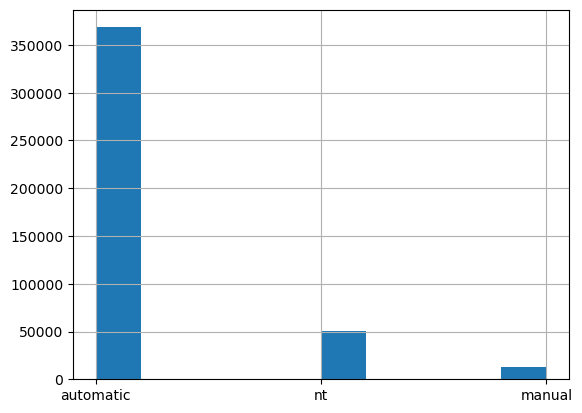

In [1273]:
train['transmission'].hist()

Посмотрим столбец body(тип кузова транспортного средства.

In [1274]:
train['body'].unique()

array(['suv', 'Sedan', 'sedan', nan, 'SUV', 'wagon', 'Minivan',
       'Extended Cab', 'Regular Cab', 'Coupe', 'SuperCrew', 'Wagon',
       'convertible', 'Crew Cab', 'SuperCab', 'Convertible', 'Hatchback',
       'minivan', 'hatchback', 'G Coupe', 'G Convertible', 'coupe',
       'Access Cab', 'G Sedan', 'regular cab', 'e-series van',
       'supercrew', 'Quad Cab', 'tsx sport wagon', 'Van', 'g sedan',
       'E-Series Van', 'CTS Coupe', 'Koup', 'King Cab', 'extended cab',
       'double cab', 'Elantra Coupe', 'koup', 'access cab', 'Double Cab',
       'crew cab', 'quad cab', 'g coupe', 'CrewMax Cab', 'supercab',
       'g convertible', 'Genesis Coupe', 'van', 'G37 Coupe', 'club cab',
       'Beetle Convertible', 'Mega Cab', 'regular-cab', 'Xtracab',
       'cts coupe', 'genesis coupe', 'Club Cab', 'q60 coupe', 'mega cab',
       'crewmax cab', 'Promaster Cargo Van', 'king cab', 'CTS-V Coupe',
       'TSX Sport Wagon', 'CTS Wagon', 'Cab Plus 4', 'G37 Convertible',
       'Transit Van'

Приведем значения в столбце body к нижнему регистру.

In [1275]:
train['body'] = train['body'].str.lower()

In [1276]:
len(train['body'].unique())

46

<Axes: xlabel='body'>

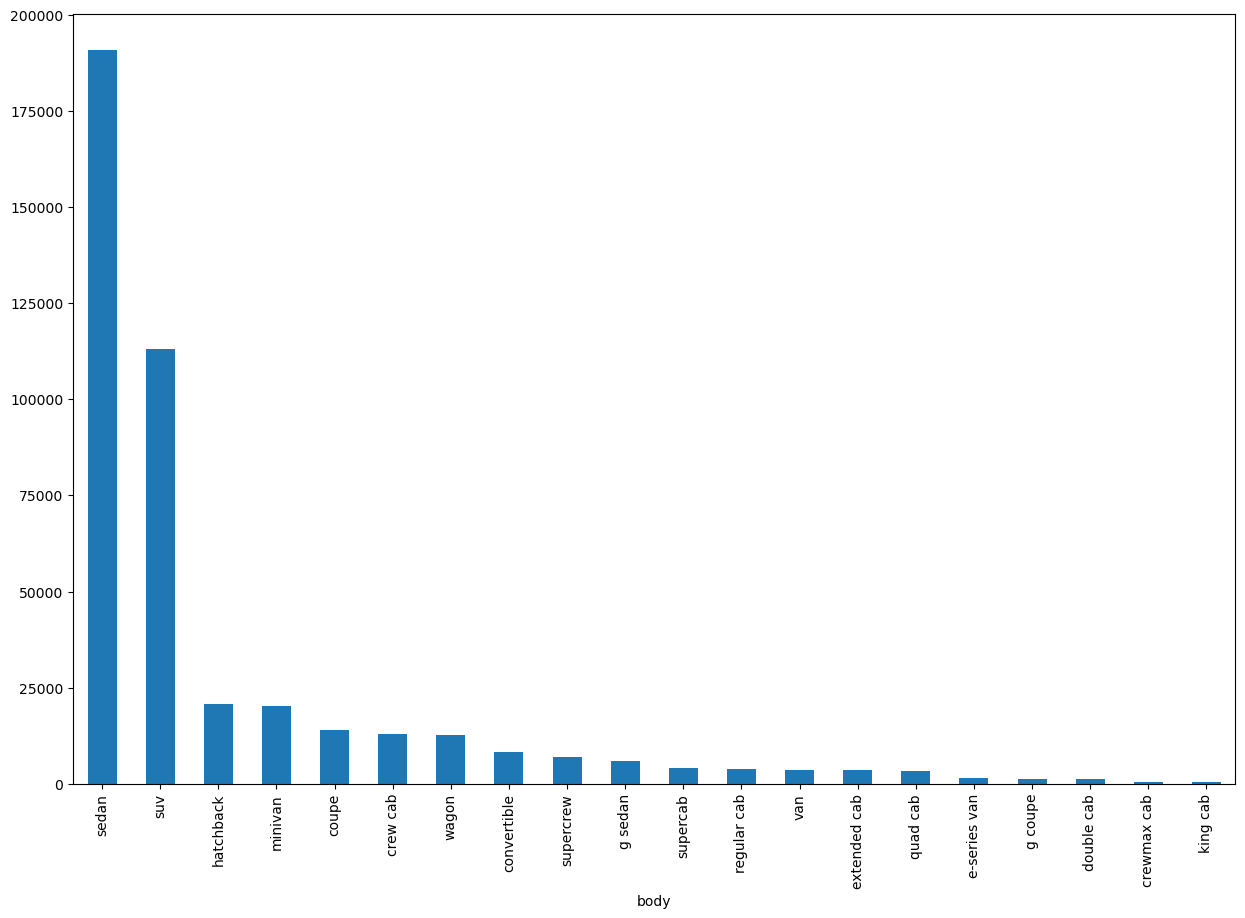

In [1277]:
train.groupby('body')['body'].count().sort_values(ascending=False)[:20].plot( kind='bar', figsize = (15,10))

In [1278]:
train.groupby('body')['body'].count().sort_values(ascending=False)

body
sedan                      190780
suv                        113040
hatchback                   20715
minivan                     20114
coupe                       13895
crew cab                    12822
wagon                       12600
convertible                  8183
supercrew                    7081
g sedan                      5859
supercab                     4143
regular cab                  3861
van                          3544
extended cab                 3500
quad cab                     3208
e-series van                 1426
g coupe                      1282
double cab                   1260
crewmax cab                   429
king cab                      418
g convertible                 251
access cab                    232
genesis coupe                 221
club cab                      141
koup                          135
cts coupe                     115
mega cab                       94
elantra coupe                  74
beetle convertible             52
promaster

In [1279]:
train['body'].isna().sum()#train.loc[train['body']==i]

2056

In [1280]:
def body(row):
    r= row['body']
    try:
        if 'cab' in r:
            #print(r, 'cab')
            return 'cab'
        elif 'van' in r:
            #print(r, 'van')
            return 'van'
        elif 'minivan' in r:
            return 'minivan'
        elif 'wagon' in r:
            #print(r, 'wagon')
            return 'wagon'
        elif 'coupe' in r:
            #print(r, 'coupe')
            return 'coupe'
        elif 'convertible' in r:
            #print(r, 'convertible')
            return 'coupe'
        elif 'koup' in r:
            #print(r, 'koup')
            return 'coupe'
    except:
        pass

In [1281]:
sort2 = train['body'].value_counts(normalize=True)
train.loc[train['body'].isin(sort2[sort2 < 0.001].index), 'body'] = train.apply(body, axis = 1)


Изучим пропуски в столбце body.

In [1282]:
train[train['body'].isna()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
6,2010,sss,g6,sss,NaN,automatic,1g2za5eb4a4157380,nc,3.4,114587.000000,silver,black,north state acceptance,5900,Mon Jan 12 2015 09:30:00 GMT-0800 (PST),Jan,2015
494,2005,subaru,forester,forester,NaN,automatic,jf1sg67635h742120,md,2.6,154984.000000,green,—,gateway subaru,3700,Tue Jan 13 2015 09:30:00 GMT-0800 (PST),Jan,2015
551,2000,ford,f150,f150,NaN,nt,1ftrx18l3ynb31056,nc,2.7,129495.000000,green,gray,crossroads ford inc,4400,Mon Jan 12 2015 09:00:00 GMT-0800 (PST),Jan,2015
651,2005,chrysler,pacifica,pacifica,NaN,automatic,2c8gf68455r664684,ca,2.7,73141.000000,silver,black,billion dodge chrysler jeep,5400,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),Dec,2014
736,2007,mazda,cx-7,sss,NaN,automatic,jm3er293x70148212,tx,2.7,109950.000000,red,gray,dt credit corporation,5100,Tue Jan 13 2015 11:00:00 GMT-0800 (PST),Jan,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438606,2003,ford,escape,escape,NaN,automatic,1fmyu93113ka32296,va,1.0,187313.000000,silver,gray,select remarketing group llc/anderson financial,1000,Wed Jan 07 2015 09:05:00 GMT-0800 (PST),Jan,2015
438658,2011,ford,nm,nm,NaN,nt,1fdne1bw4bda64791,ca,3.9,74278.000000,white,gray,"vpsi, inc",13250,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),Dec,2014
439216,1999,sss,nm,base,NaN,automatic,1g3ws52h6xf364032,sc,2.8,159966.120015,green,beige,thomas auto sales inc,500,Thu Dec 18 2014 10:15:00 GMT-0800 (PST),Dec,2014
439382,2006,mazda,mazda5,sport,NaN,automatic,jm1cr293760104148,fl,2.9,134274.000000,blue,black,courtesy palm harbor honda,3500,Tue Dec 23 2014 16:00:00 GMT-0800 (PST),Dec,2014


Удалим строки с пропусками тип кузова.

In [1283]:
train.dropna(subset = ['body'], inplace=True)

Изучим столбец color(цвет кузова автомобиля).

In [1284]:
train['color'].unique()

array(['black', 'gold', 'blue', 'white', 'gray', '—', 'silver', 'red',
       'brown', 'green', 'beige', nan, 'off-white', 'yellow', 'burgundy',
       'orange', 'charcoal', 'purple', 'turquoise', 'lime', 'pink'],
      dtype=object)

<Axes: xlabel='color'>

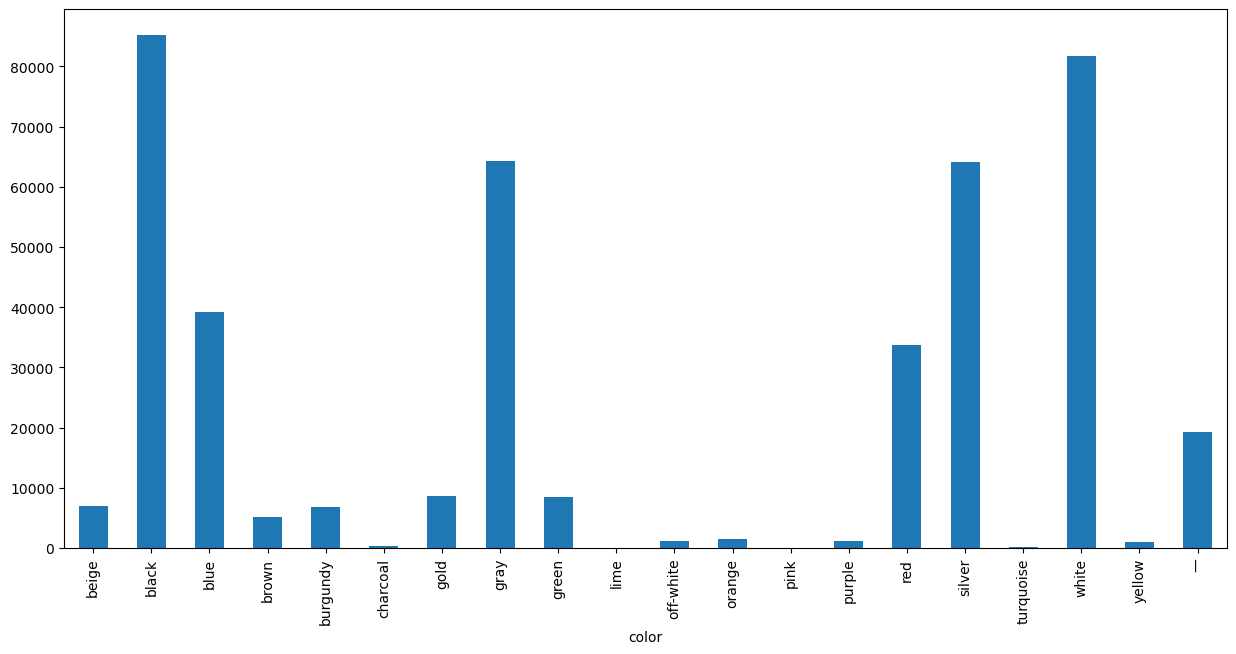

In [1285]:
train.groupby('color')['color'].count().plot( kind='bar', figsize = (15,7))

Заменим пропуски в столбце на знак "—"

In [1286]:
train.loc[train['color'].isna(), 'color']='—'

In [1287]:
train.groupby('color')['color'].count()

color
beige         7013
black        85249
blue         39145
brown         5235
burgundy      6883
charcoal       383
gold          8584
gray         64211
green         8523
lime            14
off-white     1119
orange        1547
pink            32
purple        1204
red          33666
silver       64164
turquoise      175
white        81779
yellow         937
—            19895
Name: color, dtype: int64

Изучим столбец interior(цвет салона автомобиля).

In [1288]:
train['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

<Axes: xlabel='interior'>

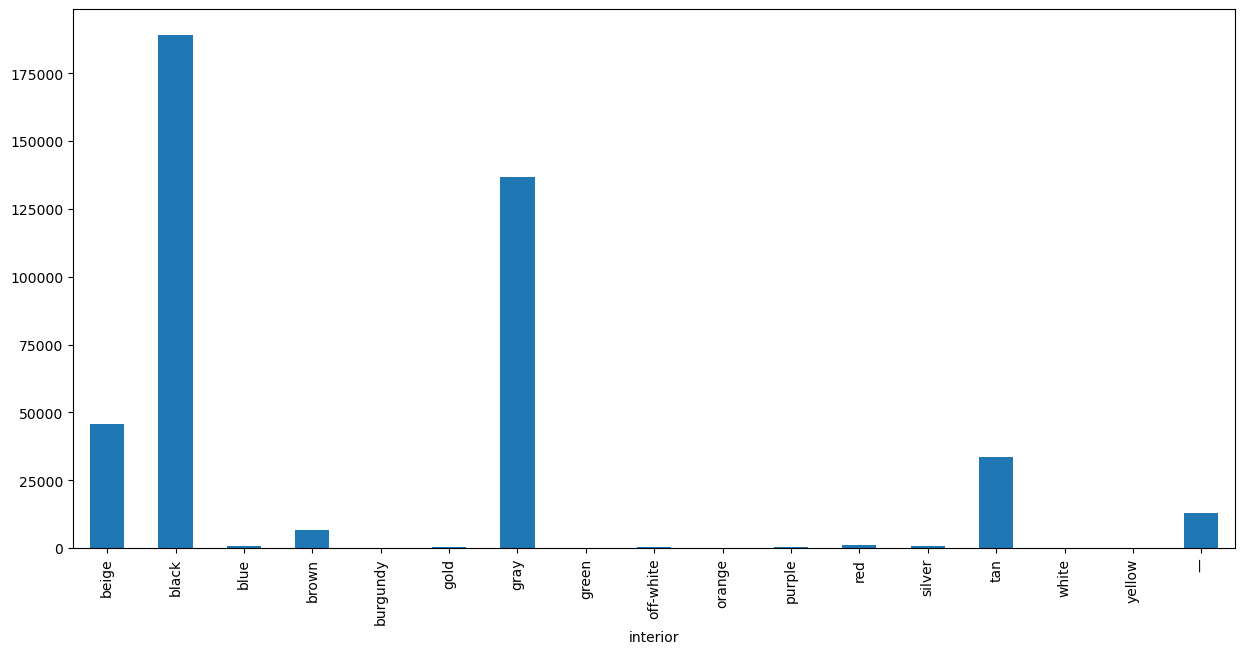

In [1289]:
train.groupby('interior')['interior'].count().plot( kind='bar', figsize = (15,7))

In [1290]:
train.groupby('interior')['interior'].count()

interior
beige         45686
black        189173
blue            805
brown          6631
burgundy        150
gold            250
gray         136776
green           179
off-white       373
orange          101
purple          270
red            1039
silver          818
tan           33697
white           209
yellow           16
—             13023
Name: interior, dtype: int64

Заменим пропуски в столбце на знак "—"

In [1291]:
train.loc[train['interior'].isna(), 'interior']='—'

Изучим столбец seller(продавец автомобиля)

In [1292]:
train['seller'].unique()

array(['santander consumer', 'ars/avis budget group',
       'nissan-infiniti lt', ..., 'autostar enterprises',
       'kocourek nissan', 'studio city auto group'], dtype=object)

In [1293]:
len(train['seller'].unique())

12786

In [1294]:
train['seller'].value_counts(sort=True)#[:10]

nissan-infiniti lt                       15823
ford motor credit company,llc            15259
the hertz corporation                    14657
santander consumer                       11974
avis corporation                         10091
                                         ...  
onemain rem/premier motors inc               1
napleton's schaumburg pontiac gmc inc        1
mercedes-benz of tri-cities                  1
wy hy fcu                                    1
studio city auto group                       1
Name: seller, Length: 12786, dtype: int64

Первая десятка автосолонов продают автомобили в больших колличествах, от 5 тыс. до 15 тыс.
далее первые 55 автосалонов более 1000 автомобилей, остальные продавц продают меньше и так 
вплоть до одной продажи(видимо это частные лица). Автосалон может продавать как дешевле так
и дороже, исходя из этого данные столбеца надо обработать. Продавцов и низкой частотой 
встречаемости запишем в категорию another 

In [1295]:
sort3 = train['seller'].value_counts(normalize=True)
train.loc[train['seller'].isin(sort3[sort3 < 0.0001].index), 'seller'] = 'another'

Так как одним из главных факторов ценообразования является возраст автомобиля на момент 
продажи, необходимо добавить столбец с возрастом на момент продажи. 

In [1296]:
train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015


In [1297]:
train['sele_year'] = train['sele_year'].astype(int)

In [1298]:
train['age'] = train['sele_year'] - train['year']

In [1299]:
train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,month,sele_year,age
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),Jun,2015,4
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST),Feb,2015,1
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT),Jun,2015,3
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT),Jun,2015,12
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST),Feb,2015,8


In [1300]:
train.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
month           0
sele_year       0
age             0
dtype: int64

## 2. Разделение на выборки

Удалим не информативные столбцы.

In [1301]:
train = train.drop(['year', 'vin', 'saledate', 'sele_year'], axis = 1)

Выделим из  таблицы train признаки и целевой признак.

In [1302]:
features_1 = train.drop(['sellingprice'], axis = 1)
target_1 = train['sellingprice']

Разделим таблицу train на тренировочную и валидционную выборки

In [1303]:
features_train, features_valid, target_train, target_valid = train_test_split\
(features_1, target_1,  test_size = 0.25, random_state =12345)

In [1304]:
features_train.info();target_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322318 entries, 194987 to 222793
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          322318 non-null  object 
 1   model         322318 non-null  object 
 2   trim          322318 non-null  object 
 3   body          322318 non-null  object 
 4   transmission  322318 non-null  object 
 5   state         322318 non-null  object 
 6   condition     322318 non-null  float64
 7   odometer      322318 non-null  float64
 8   color         322318 non-null  object 
 9   interior      322318 non-null  object 
 10  seller        322318 non-null  object 
 11  month         322318 non-null  object 
 12  age           322318 non-null  int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 34.4+ MB
<class 'pandas.core.series.Series'>
Int64Index: 322318 entries, 194987 to 222793
Series name: sellingprice
Non-Null Count   Dtype
--------------   -----
322318 

In [1305]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107440 entries, 410769 to 303691
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          107440 non-null  object 
 1   model         107440 non-null  object 
 2   trim          107440 non-null  object 
 3   body          107440 non-null  object 
 4   transmission  107440 non-null  object 
 5   state         107440 non-null  object 
 6   condition     107440 non-null  float64
 7   odometer      107440 non-null  float64
 8   color         107440 non-null  object 
 9   interior      107440 non-null  object 
 10  seller        107440 non-null  object 
 11  month         107440 non-null  object 
 12  age           107440 non-null  int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 11.5+ MB


## 3. Репроцессенг данных

Проведем порядковое кодирование.
Чтобы провести порядковое кодирование необходимо отделить толбцы с котегориальными значениями от столбцов с колличественными значениями. Затем провести прямое кодирование затем объядинить обратно в ту же таблицу по индексу методом join().

In [1306]:
features_train.head(10)

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,month,age
194987,ford,focus,sel,sedan,automatic,fl,3.6,60357.0,white,black,dtg operations inc,Feb,3
239065,infiniti,jx,jx35,suv,automatic,la,4.2,41819.0,burgundy,black,the hertz corporation,Jan,2
428556,jeep,compass,sport,suv,automatic,nc,4.0,42669.0,green,gray,bb&t,Feb,3
210437,nissan,altima,2.5 s,sedan,automatic,il,4.9,9787.0,white,black,nissan motor acceptance corporation,Jan,1
154728,toyota,corolla,le,sedan,automatic,fl,4.6,37272.0,white,beige,world omni financial corporation,Feb,4
402137,ford,escape,se,suv,automatic,mi,4.5,19958.0,gray,black,"ford motor credit company,llc",Jan,2
179140,nissan,altima,2.5,sedan,automatic,ma,4.2,52604.0,silver,black,the hertz corporation,Mar,2
291366,chevrolet,equinox,lt,suv,automatic,ca,2.7,69997.0,silver,gray,premium auto wholesale,Jan,10
12622,honda,crosstour,ex,hatchback,automatic,nj,2.8,27523.0,black,black,"ahfc/honda lease trust/hvt, inc. eot",Jan,3
4082,hyundai,accent,gls,sedan,automatic,ms,3.7,121903.0,black,gray,go financial,Jun,5


In [1307]:
d1_enc = features_train[['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller']]

In [1308]:
d1_enc

,make,model,trim,body,transmission,state,color,interior,month,seller
194987,ford,focus,sel,sedan,automatic,fl,white,black,Feb,dtg operations inc
239065,infiniti,jx,jx35,suv,automatic,la,burgundy,black,Jan,the hertz corporation
428556,jeep,compass,sport,suv,automatic,nc,green,gray,Feb,bb&t
210437,nissan,altima,2.5 s,sedan,automatic,il,white,black,Jan,nissan motor acceptance corporation
154728,toyota,corolla,le,sedan,automatic,fl,white,beige,Feb,world omni financial corporation
...,...,...,...,...,...,...,...,...,...,...
356003,hyundai,sonata,lx,sedan,automatic,ca,blue,beige,Jan,another
405018,infiniti,g sedan,g37x,g sedan,automatic,nj,black,gray,Feb,nissan infiniti lt
402022,hyundai,sonata,gls,sedan,nt,pa,red,beige,Jun,hyundai motor finance
79125,infiniti,q50,premium,sedan,automatic,ca,white,black,Jan,nissan infiniti lt


In [1309]:
encoder = OrdinalEncoder()#handle_unknown='use_encoded_value', unknown_value='sss')
encoder.fit(d1_enc)
data_ordinal_1 = encoder.transform(d1_enc)
data_ordinal_1 = pd.DataFrame(encoder.transform(d1_enc), columns=d1_enc.columns, index = d1_enc.index)
data_ordinal_1

,make,model,trim,body,transmission,state,color,interior,month,seller
194987,10.0,170.0,454.0,13.0,0.0,5.0,17.0,1.0,2.0,366.0
239065,15.0,239.0,313.0,16.0,0.0,10.0,4.0,1.0,3.0,1030.0
428556,18.0,88.0,488.0,16.0,0.0,17.0,8.0,6.0,2.0,133.0
210437,29.0,36.0,39.0,13.0,0.0,8.0,17.0,1.0,3.0,788.0
154728,41.0,95.0,329.0,13.0,0.0,5.0,17.0,0.0,2.0,1123.0
...,...,...,...,...,...,...,...,...,...,...
356003,14.0,393.0,359.0,13.0,0.0,3.0,2.0,0.0,3.0,43.0
405018,15.0,186.0,264.0,8.0,0.0,19.0,1.0,6.0,2.0,786.0
402022,14.0,393.0,279.0,13.0,2.0,28.0,14.0,0.0,5.0,582.0
79125,15.0,322.0,394.0,13.0,0.0,3.0,17.0,1.0,3.0,786.0


In [1310]:
d1_qt = features_train.drop(['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller'], axis = 1)
features_train = data_ordinal_1.join(d1_qt, how='left')

In [1311]:
features_train

,make,model,trim,body,transmission,state,color,interior,month,seller,condition,odometer,age
194987,10.0,170.0,454.0,13.0,0.0,5.0,17.0,1.0,2.0,366.0,3.6,60357.0,3
239065,15.0,239.0,313.0,16.0,0.0,10.0,4.0,1.0,3.0,1030.0,4.2,41819.0,2
428556,18.0,88.0,488.0,16.0,0.0,17.0,8.0,6.0,2.0,133.0,4.0,42669.0,3
210437,29.0,36.0,39.0,13.0,0.0,8.0,17.0,1.0,3.0,788.0,4.9,9787.0,1
154728,41.0,95.0,329.0,13.0,0.0,5.0,17.0,0.0,2.0,1123.0,4.6,37272.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356003,14.0,393.0,359.0,13.0,0.0,3.0,2.0,0.0,3.0,43.0,2.1,217868.0,9
405018,15.0,186.0,264.0,8.0,0.0,19.0,1.0,6.0,2.0,786.0,3.2,40197.0,3
402022,14.0,393.0,279.0,13.0,2.0,28.0,14.0,0.0,5.0,582.0,3.9,45324.0,3
79125,15.0,322.0,394.0,13.0,0.0,3.0,17.0,1.0,3.0,786.0,4.2,12096.0,1


Проведем маштабирование признаков.

In [1312]:
numeric = features_train.columns
numeric

Index(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color',
       'interior', 'month', 'seller', 'condition', 'odometer', 'age'],
      dtype='object')

array([[<Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'model'}>,
        <Axes: title={'center': 'trim'}>,
        <Axes: title={'center': 'body'}>],
       [<Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'color'}>,
        <Axes: title={'center': 'interior'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'seller'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

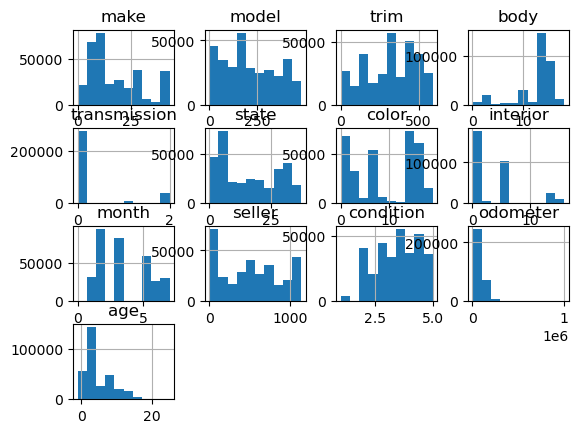

In [1313]:
features_train.hist()

Так как среди признаков практически ни где нет нормального распределения
используем метод RobustScaler().

In [1314]:
scaler_1 = RobustScaler()
features_train[numeric] = scaler_1.fit_transform(features_train[numeric])
features_train

,make,model,trim,body,transmission,state,color,interior,month,seller,condition,odometer,age
194987,-0.10,-0.073733,0.389474,0.000000,0.0,-0.391304,0.769231,0.0,-0.333333,-0.172107,0.000000,0.130106,0.0
239065,0.15,0.244240,-0.105263,1.000000,0.0,-0.173913,-0.230769,0.0,0.000000,0.813056,0.400000,-0.134648,-0.2
428556,0.30,-0.451613,0.508772,1.000000,0.0,0.130435,0.076923,1.0,-0.333333,-0.517804,0.266667,-0.122508,0.0
210437,0.85,-0.691244,-1.066667,0.000000,0.0,-0.260870,0.769231,0.0,0.000000,0.454006,0.866667,-0.592119,-0.4
154728,1.45,-0.419355,-0.049123,0.000000,0.0,-0.391304,0.769231,-0.2,-0.333333,0.951039,0.666667,-0.199587,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356003,0.10,0.953917,0.056140,0.000000,0.0,-0.478261,-0.384615,-0.2,0.000000,-0.651335,-1.000000,2.379629,1.2
405018,0.15,0.000000,-0.277193,-1.666667,0.0,0.217391,-0.461538,1.0,-0.333333,0.451039,-0.266667,-0.157813,0.0
402022,0.10,0.953917,-0.224561,0.000000,2.0,0.608696,0.538462,-0.2,0.666667,0.148368,0.200000,-0.084590,0.0
79125,0.15,0.626728,0.178947,0.000000,0.0,-0.478261,0.769231,0.0,0.000000,0.451039,0.400000,-0.559142,-0.4


## 4. Обучение моделей


Трансформируем валидатационную выборку с помощью кодировщика и скейлера, обученных на тренировочных данных.

In [1315]:
d1_enc_valid = features_valid[['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller']]
data_ordinal_1_valid = encoder.transform(d1_enc_valid)
data_ordinal_1_valid = pd.DataFrame(encoder.transform(d1_enc_valid), columns=d1_enc_valid.columns, index = d1_enc_valid.index)
d1_qt_valid = features_valid.drop(['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller'], axis = 1)
features_valid = data_ordinal_1_valid.join(d1_qt_valid, how='left')
features_valid[numeric] = scaler_1.fit_transform(features_valid[numeric])

features_valid

,make,model,trim,body,transmission,state,color,interior,month,seller,condition,odometer,age
410769,-0.25,1.082192,0.635417,-1.000000,0.0,0.217391,-0.384615,1.0,0.666667,-0.648368,-0.200000,0.585427,0.8
109333,0.80,-0.301370,-0.166667,-1.333333,0.0,-0.391304,0.615385,0.0,1.333333,-0.172107,-1.133333,0.932660,1.6
115501,-0.10,-0.141553,0.822917,1.000000,0.0,-0.260870,0.000000,0.0,0.666667,-0.019288,0.000000,-0.044996,-0.2
276829,1.45,0.712329,-0.684028,1.000000,0.0,-0.130435,0.076923,2.4,0.000000,-0.318991,-1.200000,0.765600,1.0
219190,0.15,0.000000,-0.291667,-1.666667,0.0,-0.478261,0.000000,0.0,-0.333333,0.454006,0.333333,-0.403993,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193960,1.45,-0.305936,-0.684028,0.000000,2.0,-0.391304,0.538462,-0.2,0.000000,-0.648368,-0.733333,1.459347,1.8
2462,0.70,0.520548,0.173611,-1.000000,0.0,0.434783,-0.384615,1.0,1.000000,-0.311573,-0.066667,0.765513,1.6
206229,-0.45,-0.831050,-0.888889,0.000000,0.0,-0.391304,0.000000,0.0,0.000000,0.357567,0.466667,-0.405757,0.2
255815,0.95,0.063927,0.378472,0.000000,0.0,0.130435,0.769231,1.0,0.000000,0.563798,0.400000,0.726478,1.6


In [1316]:
best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid) 
    result = mean_squared_error(target_valid, predictions_valid)**0.5
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print("RMSE наилучшей модели на валидационной выборке:", best_result, "Глубина дерева:", best_depth)

RMSE наилучшей модели на валидационной выборке: 6489.327827111233 Глубина дерева: 5


In [1317]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(1, 10):
    #print(est, 'est')
    for depth in range (1, 7):
        #print(depth)
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = mean_squared_error(target_valid, predictions_valid)**0.5
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("RMSE наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:",\
      best_est, "Максимальная глубина:", depth)

RMSE наилучшей модели на валидационной выборке: 6075.806759756008 Количество деревьев: 9 Максимальная глубина: 6


In [1318]:
target_valid

410769     7450
109333     1600
115501    20400
276829     7100
219190    18000
          ...  
193960     3000
2462       3700
206229    20800
255815     1900
303691    10400
Name: sellingprice, Length: 107440, dtype: int64

In [1319]:
model = LinearRegression()# инициализируйте модель LinearRegression
model.fit(features_train, target_train) # обучите модель на тренировочной выборке
predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке

result = mean_squared_error(target_valid, predictions_valid)**0.5# посчитайте значение метрики RMSE на валидационной выборке
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 7230.481461030357


## 5. Выбор наилучшей модели на валидатационной выборке


В ходе исследования и проветки на валидационной выборке было установленно:
Модель случайный лес лучше другх определяет цену б/у автомобиля.
- Гиперпараметры: RMSE = {{best_result}} 
                  Количество деревьев = {best_est}
                  Максимальная глубина = {{depth}}
- На вычисление уходит достаточно много времяни.

## 6. Проверка на тестовой выборке


Подготовка данных тестовой выборки для исследования. 

In [1354]:
#test = pd.read_csv(r"C:\Users\Admin\dev1\second-project\test.csv")
#test

In [1321]:
test['month'] = test.apply(month, axis =1)

In [1322]:
test['condition']=test['condition'].fillna(sred_c)

In [1323]:
test['odometer'] = test['odometer'].fillna(0)
for i in years.index:
    test.loc[(test['odometer']==1)&(test['year']==i), 'odometer'] =  years[i]

In [1324]:
delet_test =test[(test['make'].isna())&(test['model'].isna())&(test['trim'].isna())&\
             (test['transmission'].isna())&(test['body'].isna())].index.array
test = test.drop(index =delet_test)

In [1325]:
test.isna().sum()

year                0
make             1707
model            1725
trim             1760
body             2240
transmission    12657
vin                 0
state               0
condition           0
odometer            0
color             157
interior          157
seller              0
saledate            0
month               0
dtype: int64

In [1326]:
test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,month
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),Jan
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),Feb
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),Feb
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST),Mar
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),Jun


In [1327]:
test.loc[(test['make'].isna()), 'make'] = test.apply(make, axis=1)



sort_t = test['trim'].value_counts(normalize=True)
test.loc[test['trim'].isin(sort_t[sort_t < 0.0001].index), 'trim'] = 'sss'
test['transmission'] = test['transmission'].fillna('nt')

sort_t2 = test['body'].value_counts(normalize=True)
test.loc[test['body'].isin(sort_t2[sort_t2 < 0.001].index), 'body'] = test.apply(body, axis = 1)
test.dropna(subset = ['body'], inplace=True)
sort_t1 = test['seller'].value_counts(normalize=True)
test.loc[test['seller'].isin(sort_t1[sort_t1 < 0.0001].index), 'seller'] = 'another'
test.loc[test['interior'].isna(), 'interior']='—'
test.loc[test['color'].isna(), 'color']='—'
test['sele_year'] = test.apply(sale_year, axis=1)
test['sele_year'] = test['sele_year'].astype(int)
test['age'] = test['sele_year'] - test['year']
test = test.drop(['year', 'vin', 'saledate', 'sele_year'], axis = 1)
test.dropna(subset = ['model'], inplace=True)

test['trim'] = test['trim'].str.lower()
test['make'] = test['make'].str.lower()
test['model'] = test['model'].str.lower()
test['body'] = test['body'].str.lower()

In [1328]:
#test.loc[(test['trim']=='sss'), 'trim']=test['model']

In [1329]:
test.loc[test['make']=='bentley', 'make'] = 'sss'

In [1330]:
sort_ = test['model'].value_counts(normalize=True)
test.loc[test['model'].isin(sort_[sort_ < 0.0005].index), 'model'] = 'nm'
sort_

altima         0.034934
f-150          0.025593
fusion         0.023872
camry          0.022657
escape         0.021432
                 ...   
sts-v          0.000009
s-10 blazer    0.000009
300zx          0.000009
flying spur    0.000009
caprice        0.000009
Name: model, Length: 697, dtype: float64

In [1331]:
sort_t3 = test['make'].value_counts(normalize=True)
test.loc[test['make'].isin(sort_t3[sort_t3 < 0.0001].index), 'make'] = 'sss'
#sort_t3

In [1332]:
test.loc[test['make']=='bentley', 'make'] = 'sss'

In [1333]:
test.loc[test['model']=='nm']

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,month,age
27,oldsmobile,nm,gl1,sedan,automatic,nc,2.7,133014.0,white,beige,hendrick toyota scion concord,Jun,13
29,pontiac,nm,sss,minivan,automatic,pa,4.4,109666.0,silver,gray,mascio motor car,Feb,10
47,volvo,nm,base,wagon,automatic,md,2.8,89590.0,gray,—,another,Dec,10
56,lincoln,nm,base,sedan,automatic,fl,1.9,181046.0,white,tan,another,Dec,12
66,audi,nm,quattro,sedan,automatic,ca,2.7,96083.0,black,black,newport lexus,Feb,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109960,infiniti,nm,base,suv,nt,pa,4.0,32588.0,silver,black,the hertz corporation,Jun,1
109979,toyota,nm,sss,hatchback,automatic,mo,4.1,20667.0,silver,black,tdaf remarketing,Dec,1
109992,bmw,nm,550i xdrive,hatchback,nt,pa,2.8,54047.0,black,black,financial services remarketing (lease),May,3
109993,acura,nm,3.2,coupe,automatic,md,3.1,160020.0,gold,gray,lexus of annapolis,Jan,12


In [1334]:
test

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,month,age
0,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,Jan,10
1,gmc,savana cargo,2500,van,nt,pa,4.4,6286.0,white,gray,u-haul,Feb,1
2,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Feb,2
3,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Mar,2
4,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,Jun,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,jeep,wrangler,sport,suv,automatic,ca,3.8,66085.0,orange,black,dtg operations inc,Jan,4
110054,lexus,is 250,base,sedan,automatic,fl,4.8,17588.0,gray,black,lexus financial services,Jun,1
110055,nissan,maxima,3.5 sl,sedan,automatic,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,Feb,11
110056,nissan,nm,base,coupe,manual,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,Jun,2


In [1335]:
ff = ['z51', '5.0', 'limited ffv', 'xjl', 'tdi sel premium', 'i sport value edition', 'lux',\
      'advance package', '2.5x limited', '3.8 track', 'ls ultimate', 'cls550 4matic', 'ml320 cdi',\
      's600', 'sc2', '540i', 'cl500', 'tremor', 'blue', 'sss', 'lx v6', 'value edition', 'glx vr6', \
      'bighorn', 'gls tdi', '2.0 tdi premium', '750li xdrive', '4.2', 'c63 amg', '750i xdrive', \
      '2.0t avant premium quattro', '1.8 tfsi premium', 'vanden plas', 'outback sport', '4.0',\
      '2.8 quattro', 'ralliart', 'wagon xlt lwb', 'lx v-6', '4s', '225hp quattro', 'limited v6', '2ls fleet']
for i in ff:
    test.loc[test['trim']==i, 'trim']='sss'

In [1336]:
ww = ['audi northlake', 'wells fargo dealer services-tra', 'remarketing by ge/manheim nevada', \
      'williams buick gmc', 'corona auto wholesale inc', 'coggin acura', 'keyvoor inc', \
      'remarketing by ge/manheim pensacola', 'improved credit lending', 'budget rent a car/omaha',\
      'auto finance solutions dba abc remarketing', 'connell chevrolet', 'honda manufacturing of alabama',\
      'remarketing by ge/manheim arena illinois', 'remarketing by ge/sw1 remarketing', 'luxury cars of smithtown inc',\
      'primeritus remarketing/fast line auto sales inc', 'toyota of renton', 'premium cars wholesale ltd', \
      'kly international llc', 'mercedes benz and porsche of atlantic city', 'hornburg jaguar', 'five star bank',\
      'boardwalk honda', 'remarketing by ge/schools first fcu', 'hendrick honda bradenton',\
      'primeritus remarketing/cu recovery', 'vw credit canada, inc', 'm/r motors inc',\
      'performance chrysler jeep dodge inc', 'wheels of fortune auto, inc', 'waldorf chrysler jeep', \
      'bergeys chevrolet inc', 'autonation ford delray', 'northwest motorsport', 'north country ford', \
      'flood ford of east greenwich', 'j baer remarketing', 'dollar thrifty damage liquidation',\
      'auction credit', 'crown honda', "brown's leesburg hyundai", 'mcdonald auto sales & leasing',\
      'mentor mitsubishi', 'sheehy nissan', 'auction direct usa raleigh llc', 'shamaley ford',\
      'crossroads infiniti south inc', 'crossroads ford lincoln of sanford inc', 'courtesy kia mitsubishi',\
      'enterprise rent a car', 'bredemann lexus in glenview', 'fleet street remarketing llc', \
      'united acceptance inc', 'north bakersfield toyota scion', 'allen cadillac gmc', \
      'leasing associates inc', 'central florida chrysler jeep dodge', 'darcars kia',\
      'bay ridge honda suzuki kia', 'b & j car company', 'gunn honda', 'lenders fleet services', \
      'check into cash inc.', 'car rentals inc', 'cadillac of mahwah llc', 'treasure coast toyota of stuart',\
      'west herr auto exchange inc', 'atlanta auto distributors llc', 'national remarketing services/secu',\
      'koons tysons toyota', 'a & n auto sales inc', 'five star chevrolet cadillac', 'peruzzi toyota',\
      'jaguar porsche volvo of greenville', 'towne motors inc', 'nissan dealer blend/united nissan', \
      'southeastern auto brokers inc', 'remarketing by ge/manheim orlando', 'sunland park chrysler dodge jeep ram',\
      'carl h and ruth auto sales inc', 'auto depot', 'midwestern auto group', 'courtesy ford',\
      'enterprise vehicle exchange/sharonville', 'mid atlantic finance /clearwater', 'perillo bmw inc',\
      'everett chevrolet inc', 'international auto group inc', 'all auto imports inc', 'richmond car & truck sales',\
      'great neck nissan llc', 'driscoll motors', 'safford chrysler jeep dodge of springfield', \
      'mountain america credit union', 'mike motors', 'best buy repos inc', "napleton's mid rivers kia", \
      'enterprise vehicle exchange/wayne', 'cadillac of norwood', 'harry kaufmann motor cars inc',\
      'culver city volvo', 'primeritus remarketing/atlas', 'remarketing by ge/general auto acceptance llc',\
      'college park motor cars inc', 'zappone chrysler jeep dodge ram', 'north palm hyundai',\
      'lexus of henderson', 'don beyer motors inc', 'mercedes-benz of pompano', 'kjc auto title loan corp',\
      'autonation ford miami', 'avid acceptance llc', 'autonation nissan orange park', 'rockville audi', \
      'remarketing services of el paso', 'cashmoneycars', 'lbs financial credit union', 'vegas motorcars inc', \
      'gettel nissan of sarasota', '9209 0851 quebec inc', 'spreen honda', 'remarketing by ge/sound credit union',\
      'centerpoint auto exchange llc', 'napletons hyundai of aurora', 'faulkner subaru', 'crown honda greensboro',\
      'david wilsons toyota of las vegas', 'quality auto center', 'centennial hyundai', 'classic auto brokers inc',\
      'motormax automotive inc', 'metro ford', 'folger automotive llc', 'mckenna motors cerritos inc',\
      'walser leasing']
for i in ww:
    test.loc[test['seller']==i, 'seller']='another'

In [1337]:
d1_enc_test = test[['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller']]
d1_enc_test

,make,model,trim,body,transmission,state,color,interior,month,seller
0,cadillac,cts,base,sedan,automatic,ca,silver,black,Jan,lexus of stevens creek
1,gmc,savana cargo,2500,van,nt,pa,white,gray,Feb,u-haul
2,nissan,murano,s,suv,automatic,oh,gray,black,Feb,nissan-infiniti lt
3,chevrolet,impala,ls fleet,sedan,automatic,fl,silver,black,Mar,onemain rem/auto club of miami inc dba north dad
4,nissan,titan,sv,crew cab,automatic,tn,black,black,Jun,nissan north america inc.
...,...,...,...,...,...,...,...,...,...,...
110053,jeep,wrangler,sport,suv,automatic,ca,orange,black,Jan,dtg operations inc
110054,lexus,is 250,base,sedan,automatic,fl,gray,black,Jun,lexus financial services
110055,nissan,maxima,3.5 sl,sedan,automatic,va,silver,gray,Feb,shirlie slack mitsubishi
110056,nissan,nm,base,coupe,manual,tx,—,black,Jun,nissan motor acceptance corporation


In [1340]:
data_ordinal_1_test = encoder.transform(d1_enc_test)

In [1341]:
data_ordinal_1_test = pd.DataFrame(data_ordinal_1_test, columns=d1_enc_test.columns, index = d1_enc_test.index)

In [1342]:
d1_qt_test = test.drop(['make', 'model', 'trim', 'body',\
                'transmission', 'state', 'color', 'interior', 'month', 'seller'], axis = 1)

In [1343]:
d1_qt_test

,condition,odometer,age
0,2.7,116970.0,10
1,4.4,6286.0,1
2,4.6,11831.0,2
3,2.3,57105.0,2
4,2.9,31083.0,2
...,...,...,...
110053,3.8,66085.0,4
110054,4.8,17588.0,1
110055,2.9,124036.0,11
110056,2.2,27169.0,2


In [1344]:
test = data_ordinal_1_test.join(d1_qt_test, how='left')

In [1345]:
test[numeric] = scaler_1.fit_transform(test[numeric])
test

,make,model,trim,body,transmission,state,color,interior,month,seller,condition,odometer,age
0,-0.368421,-0.427885,-0.698246,0.000000,0.0,-0.478261,0.615385,0.0,0.000000,0.298220,-0.600000,0.950515,1.4
1,-0.052632,0.865385,-1.017544,1.333333,2.0,0.608696,0.769231,1.0,-0.333333,0.888724,0.533333,-0.645413,-0.4
2,0.894737,0.475962,0.291228,1.000000,0.0,0.434783,0.000000,0.0,-0.333333,0.477745,0.666667,-0.565461,-0.2
3,-0.315789,0.139423,0.000000,0.000000,0.0,-0.391304,0.615385,0.0,1.000000,0.494065,-0.866667,0.087335,-0.2
4,0.894737,1.081731,0.568421,-3.333333,0.0,0.782609,-0.461538,0.0,0.666667,0.474777,-0.466667,-0.287871,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,0.315789,1.230769,0.501754,1.000000,0.0,-0.478261,0.307692,0.0,0.000000,-0.152819,0.133333,0.216815,0.2
110054,0.473684,0.177885,-0.698246,0.000000,0.0,-0.391304,0.000000,0.0,0.666667,0.280415,0.800000,-0.482452,-0.4
110055,0.894737,0.384615,-0.947368,0.000000,0.0,0.913043,0.615385,1.0,-0.333333,0.755193,-0.466667,1.052398,1.6
110056,0.894737,0.509615,-0.698246,-3.666667,1.0,0.826087,0.923077,0.0,0.666667,0.473294,-0.933333,-0.344306,-0.2


In [1346]:
value = []
for i in sample_submission.index:
    if i not in  test.index:
        value.append(i)
#value
sample_submission = sample_submission.drop(index =value)
sample_submission= sample_submission.drop(['vin'], axis = 1)

Вычимляем среднеквадратичную ошибку на тестовой выборке.(MRSE)
Налучшая модель уже обучена и сохранена в переменной best_model. 

In [1353]:
pred_test = best_model.predict(test)
result = mean_squared_error(sample_submission, pred_test)**0.5
print('RMSE на тестовой выборке равно: ',result)

MRSE на тестовой выборке равно:  7224.716356784635


## 7. Заключение, вывод, рекомендации.

### Вывод:
   Было проведенно иследование автомобильного рынка США за восемь месяцев
с декабря 2014 по  июль 2015  года, в  ходе иследования была разработанна
модель для определения цены б/у автомобиля.
   Как и предполагалось модель случайный лес дала наилучшее RMSE =7224.71
с гиперпараметрами кол-во деревьев 9, глубина 6.
   Рекомендации:
Для построения более кочественной модели необходимо разделить  выбоку  на
кластеры - это автомобили премиум класса, комфорд класса, и эконом класса,
Эта информация: A — мини-автомобили;
                B — маленькие автомобили;
                C — среднеразмерные автомобили;
                D — полноразмерные автомобили;
                E — автомобили бизнес-класса;
                F — представительские автомобили;
                S — спортивные купе;
                M — минивэны и коммерческие автомобили;
                J — кроссоверы и внедорожники.
храниться в базе данных производителей автомобилей.
